Подключение импортов

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import numpy as np

df = pd.read_csv('kc_house_data.csv')

# 1 блок

In [ ]:

from google.colab import files

# Загрузка файла с локального компьютера
uploaded = files.upload()
#"""

Saving kc_house_data.csv to kc_house_data.csv


Задаем вспомогательные функции

In [ ]:
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number])
    df = df.dropna(axis='columns')
    df = df[[col for col in df if df[col].nunique() > 1]]
    columnNames = list(df)
    if len(columnNames) > 10:
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.5, 0.9), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [ ]:
def outliers(df,ft):
    q1 = df[ft].quantile(0.25)
    q3 = df[ft].quantile(0.75)
    iqr = q3 - q1

    lower_limit = q1 - iqr *1.5
    upper_limit = q3 + iqr *1.5

    ls = df.index[(df[ft]<lower_limit) | (df[ft]>upper_limit)]

    return ls

In [ ]:
def remove(df,ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df

# Новый раздел

Загрузка датасета

In [ ]:
df = pd.read_csv('kc_house_data.csv')

df.shape

(21613, 21)

Информация о датасете

In [ ]:
df.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  221900.0         3       1.00         1180      5650     1.0           0   
1  538000.0         3       2.25         2570      7242     2.0           0   
2  180000.0         2       1.00          770     10000     1.0           0   
3  604000.0         4       3.00         1960      5000     1.0           0   
4  510000.0         3       2.00         1680      8080     1.0           0   

   view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0     0          3      7        1180              0      1955             0   
1     0          3      7        2170            400      1951          1991   
2     0          3      6         770              0      1933             0   
3     0          5      7        1050            910      1965             0   
4     0          3      8        1680              0      1987             0   

   zipcode      lat     long  sqft_living15  sqft_lot15  month  
0    98178  47.5112 -122.257           1340        5650     10  
1    98125  47.7210 -122.319           1690        7639     12  
2    98028  47.7379 -122.233           2720        8062      2  
3    98136  47.5208 -122.393           1360        5000     12  
4    98074  47.6168 -122.045           1800        7503      2

In [ ]:
df.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671272e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517      0.766318      0.650743   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068800e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  21613.000000  21613.000000   21613.000000  21613.000000  21613.000000   
mean       7.656873   1788.390691     291.509045   1971.005136     84.402258   
std        1.175459    828.090978     442.575043     29.373411    401.679240   
min        1.000000    290.000000       0.000000   1900.000000      0.000000   
25%        7.000000   1190.000000       0.000000   1951.000000      0.000000   
50%        7.000000   1560.000000       0.000000   1975.000000      0.000000   
75%        8.000000   2210.000000     560.000000   1997.000000      0.000000   
max       13.000000   9410.000000    4820.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21613.000000  21613.000000  21613.000000   21613.000000   21613.000000  
mean   98077.939805     47.560053   -122.213896    1986.552492   12768.455652  
std       53.505026      0.138564      0.140828     685.391304   27304.179631  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471000   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.230000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

In [ ]:
df.describe(include='object')

date
count             21613
unique              372
top     20140623T000000
freq                142

In [ ]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Пустых значений нет

In [ ]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [ ]:
df['date'] = pd.to_datetime(df['date'], format='%Y%m%dT%H%M%S')

# Извлечение года, месяца и дня
# df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
# df['day'] = df['date'].dt.day

In [ ]:
unique_values = df['date'].unique()
print(unique_values)

<DatetimeArray>
['2014-10-13 00:00:00', '2014-12-09 00:00:00', '2015-02-25 00:00:00',
 '2015-02-18 00:00:00', '2014-05-12 00:00:00', '2014-06-27 00:00:00',
 '2015-01-15 00:00:00', '2015-04-15 00:00:00', '2015-03-12 00:00:00',
 '2015-04-03 00:00:00',
 ...
 '2015-03-08 00:00:00', '2014-08-30 00:00:00', '2015-05-27 00:00:00',
 '2015-03-22 00:00:00', '2015-02-15 00:00:00', '2014-10-11 00:00:00',
 '2015-02-01 00:00:00', '2014-11-30 00:00:00', '2014-08-24 00:00:00',
 '2014-07-27 00:00:00']
Length: 372, dtype: datetime64[ns]


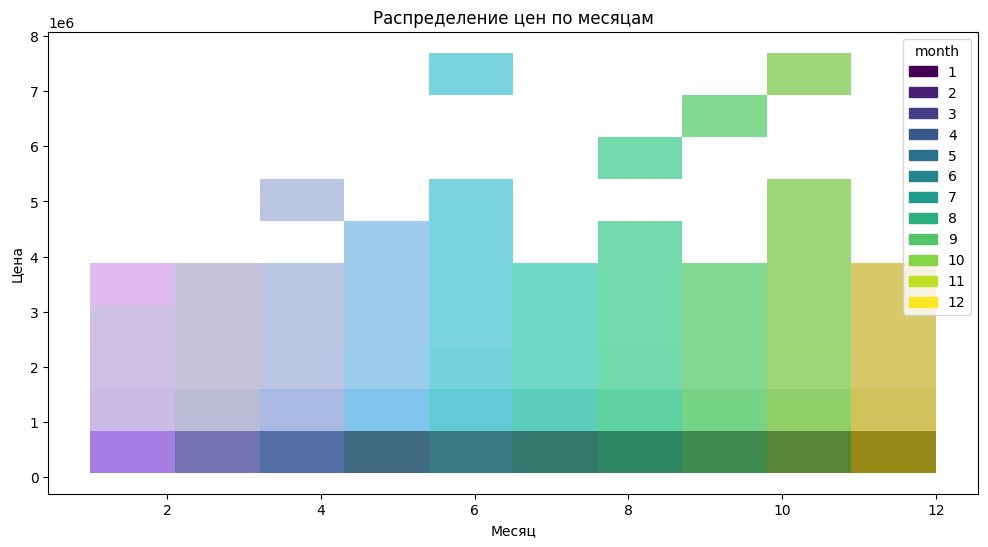

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Предположим, что у вас есть DataFrame df с колонками 'price' и 'month'

# Создание гистограммы распределения цен по месяцам
plt.figure(figsize=(12, 6))  # Устанавливаем размер графика
sns.histplot(data=df, x='month', hue='month', y='price', bins=10, palette='viridis', multiple="stack")
plt.title('Распределение цен по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Цена')
plt.show()

<ipython-input-17-9f5f06a641d1>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_prices.index, y=average_prices.values, palette='viridis')


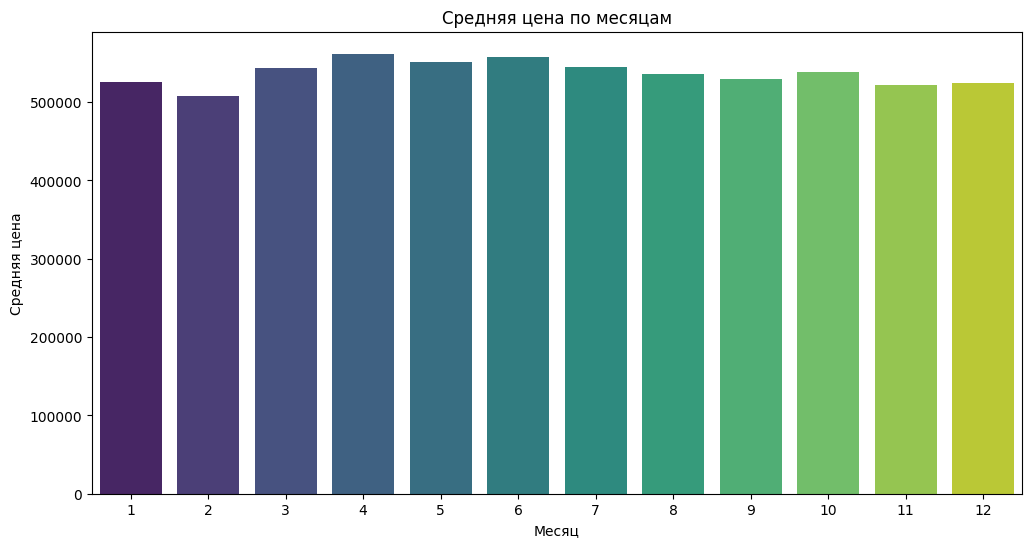

In [ ]:
average_prices = df.groupby('month')['price'].mean()

# Визуализация средней цены по месяцам
plt.figure(figsize=(12, 6))  # Установка размера графика
sns.barplot(x=average_prices.index, y=average_prices.values, palette='viridis')
plt.title('Средняя цена по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Средняя цена')
plt.show()  # средняя цена проданной недвижимости в каждом месяце (месяц не )

<ipython-input-18-b3ebba59d221>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=deal_counts.index, y=deal_counts.values, palette='viridis')


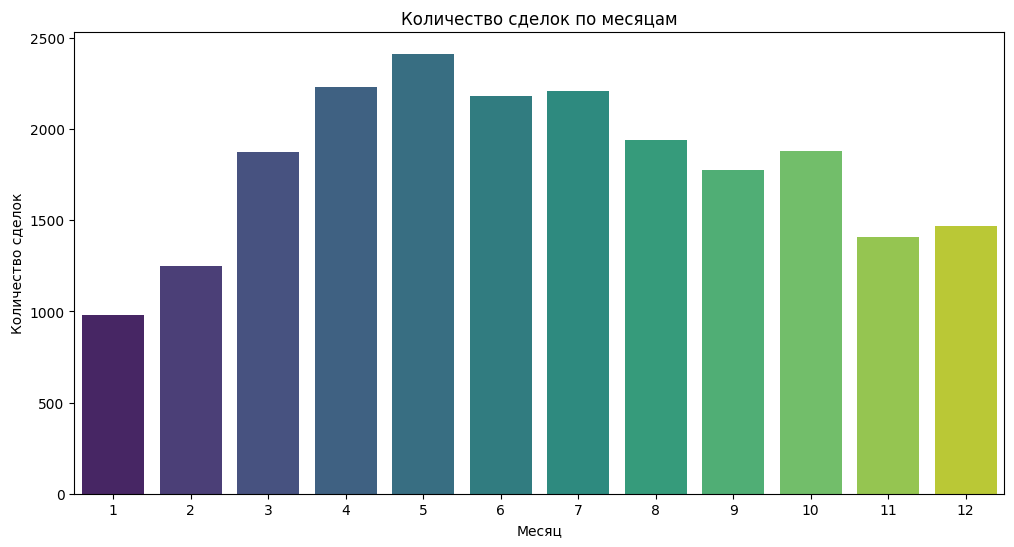

In [ ]:
deal_counts = df.groupby('month').size()

# Визуализация количества сделок по месяцам
plt.figure(figsize=(12, 6))  # Установка размера графика
sns.barplot(x=deal_counts.index, y=deal_counts.values, palette='viridis')
plt.title('Количество сделок по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Количество сделок')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Разделение данных на признаки (X) и целевую переменную (y)
df = df.drop('date', axis=1)
df = df.drop('id', axis=1)
X = df.drop('price', axis=1)
y = df['price']

# Обучение модели Random Forest
model = RandomForestRegressor()
model.fit(X, y)

# Вывод важности признаков
feature_importance = model.feature_importances_
feature_names = X.columns

for i, feature in enumerate(feature_names):
    print(f'Признак {feature}: {feature_importance[i]}')

Признак bedrooms: 0.003206948457932298
Признак bathrooms: 0.0070230046207436555
Признак sqft_living: 0.25377928402046496
Признак sqft_lot: 0.013643634805107921
Признак floors: 0.0018074694157285873
Признак waterfront: 0.029788527091239022
Признак view: 0.011585252735845816
Признак condition: 0.003069461206345097
Признак grade: 0.33014952935993275
Признак sqft_above: 0.02234877518104313
Признак sqft_basement: 0.005364862332231969
Признак yr_built: 0.0266653375328582
Признак yr_renovated: 0.001976448527467529
Признак zipcode: 0.013418707827678351
Признак lat: 0.16123595581545894
Признак long: 0.06963623306521435
Признак sqft_living15: 0.032130923696827796
Признак sqft_lot15: 0.013169644307879484


Признак bedrooms: 0.002955733589463068
Признак bathrooms: 0.006815197408373185
Признак sqft_living: 0.2647774927382521
Признак sqft_lot: 0.013226253619656882
Признак floors: 0.0017640116590963964
Признак waterfront: 0.03089867076837891
Признак view: 0.010928547344960437
Признак condition: 0.0028449309375558935
Признак grade: 0.32240656323513617
Признак sqft_above: 0.02223905870384519
Признак sqft_basement: 0.004676311922596259
Признак yr_built: 0.024154464579134286
Признак yr_renovated: 0.0019277497138447508
Признак zipcode: 0.01330522642199294
Признак lat: 0.15991756268110743
Признак long: 0.06828727912403226
Признак sqft_living15: 0.029767999410181812
Признак sqft_lot15: 0.012846804825599533
Признак month: 0.006260141316792637

          Feature  Importance
8           grade    0.330150
2     sqft_living    0.253779
14            lat    0.161236
15           long    0.069636
16  sqft_living15    0.032131
5      waterfront    0.029789
11       yr_built    0.026665
9      sqft_above    0.022349
3        sqft_lot    0.013644
13        zipcode    0.013419
17     sqft_lot15    0.013170
6            view    0.011585
1       bathrooms    0.007023
10  sqft_basement    0.005365
0        bedrooms    0.003207
7       condition    0.003069
12   yr_renovated    0.001976
4          floors    0.001807


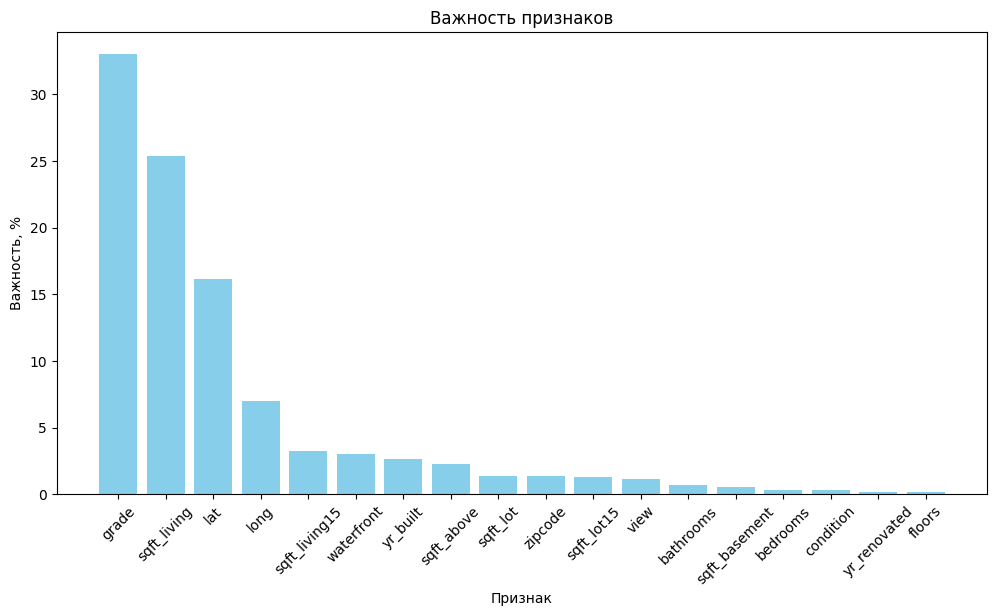

In [ ]:
# Создание DataFrame с важностью признаков
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Сортировка признаков по убыванию важности
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)
# Построение графика важности признаков
plt.figure(figsize=(12, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance']*100, color='skyblue')
plt.xlabel('Признак')
plt.ylabel('Важность, %')
plt.title('Важность признаков')
plt.xticks(rotation=45)
plt.show()

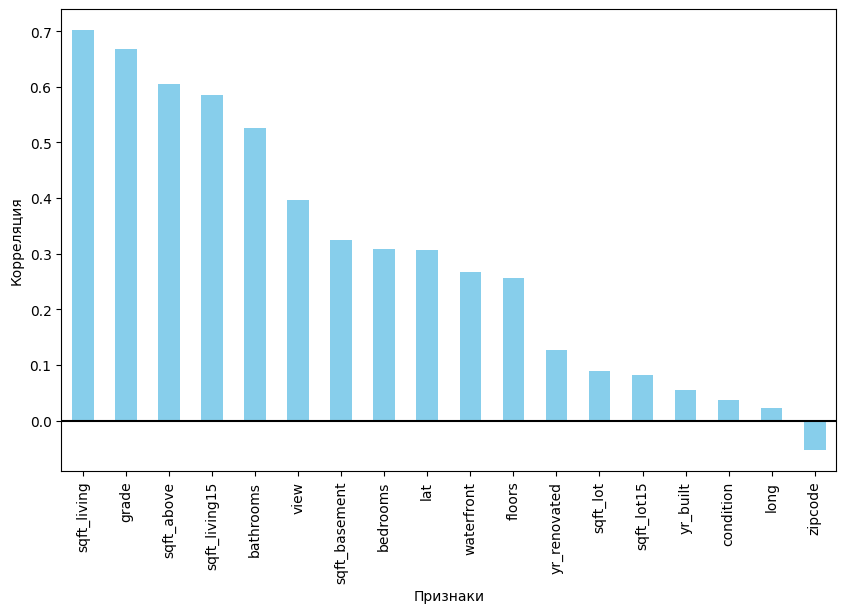

In [ ]:
# Рассчитываем корреляцию между признаками и целевой переменной 'price'
correlation = df.corr()['price'].drop('price')

# Сортируем корреляции по убыванию
correlation_sorted = correlation.sort_values(ascending=False)
# Построение графика корреляции
plt.figure(figsize=(10, 6))
plt.axhline(y=0, color='black', linestyle='-')
correlation_sorted.plot(kind='bar', color='skyblue')
plt.xlabel('Признаки')
plt.ylabel('Корреляция')
plt.show()

In [ ]:
correlation_sorted

sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
zipcode         -0.053203
Name: price, dtype: float64

In [ ]:
df.duplicated().sum()

Удалим лишние параметры

In [ ]:
df.drop("id",axis=1,inplace=True)
df.drop(['date'],axis=1,inplace=True)

Исследование зависимостей между параметрами

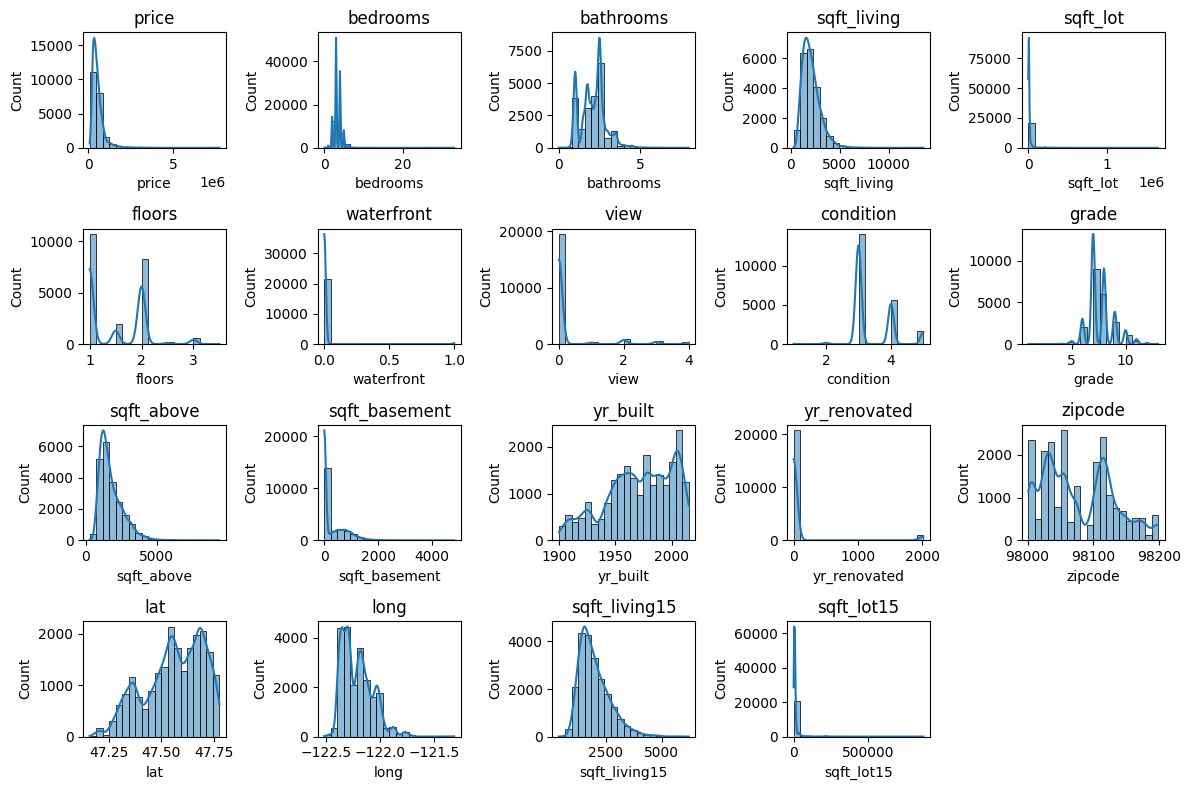

In [ ]:
plt.figure(figsize=(12, 8))
for feature in df.columns.to_list():
    plt.subplot(4, 5, df.columns.to_list().index(feature) + 1)
    sns.histplot(data=df[feature], bins=20, kde=True)
    plt.title(feature)
plt.tight_layout()
plt.show()

In [ ]:
df["waterfront"].value_counts().reset_index()

index  waterfront
0      0       21450
1      1         163

In [ ]:
df["view"].value_counts().reset_index()

view  count
0     0  19489
1     2    963
2     3    510
3     1    332
4     4    319

In [ ]:
df["yr_renovated"].value_counts().reset_index()

index  yr_renovated
0       0         20699
1    2014            91
2    2013            37
3    2003            36
4    2005            35
..    ...           ...
65   1951             1
66   1959             1
67   1948             1
68   1954             1
69   1944             1

[70 rows x 2 columns]

У параметров "waterfront","view","yr_renovated" наблюдается большое количество 0 значений

Посмотрим на зависимость параметров друг от друга

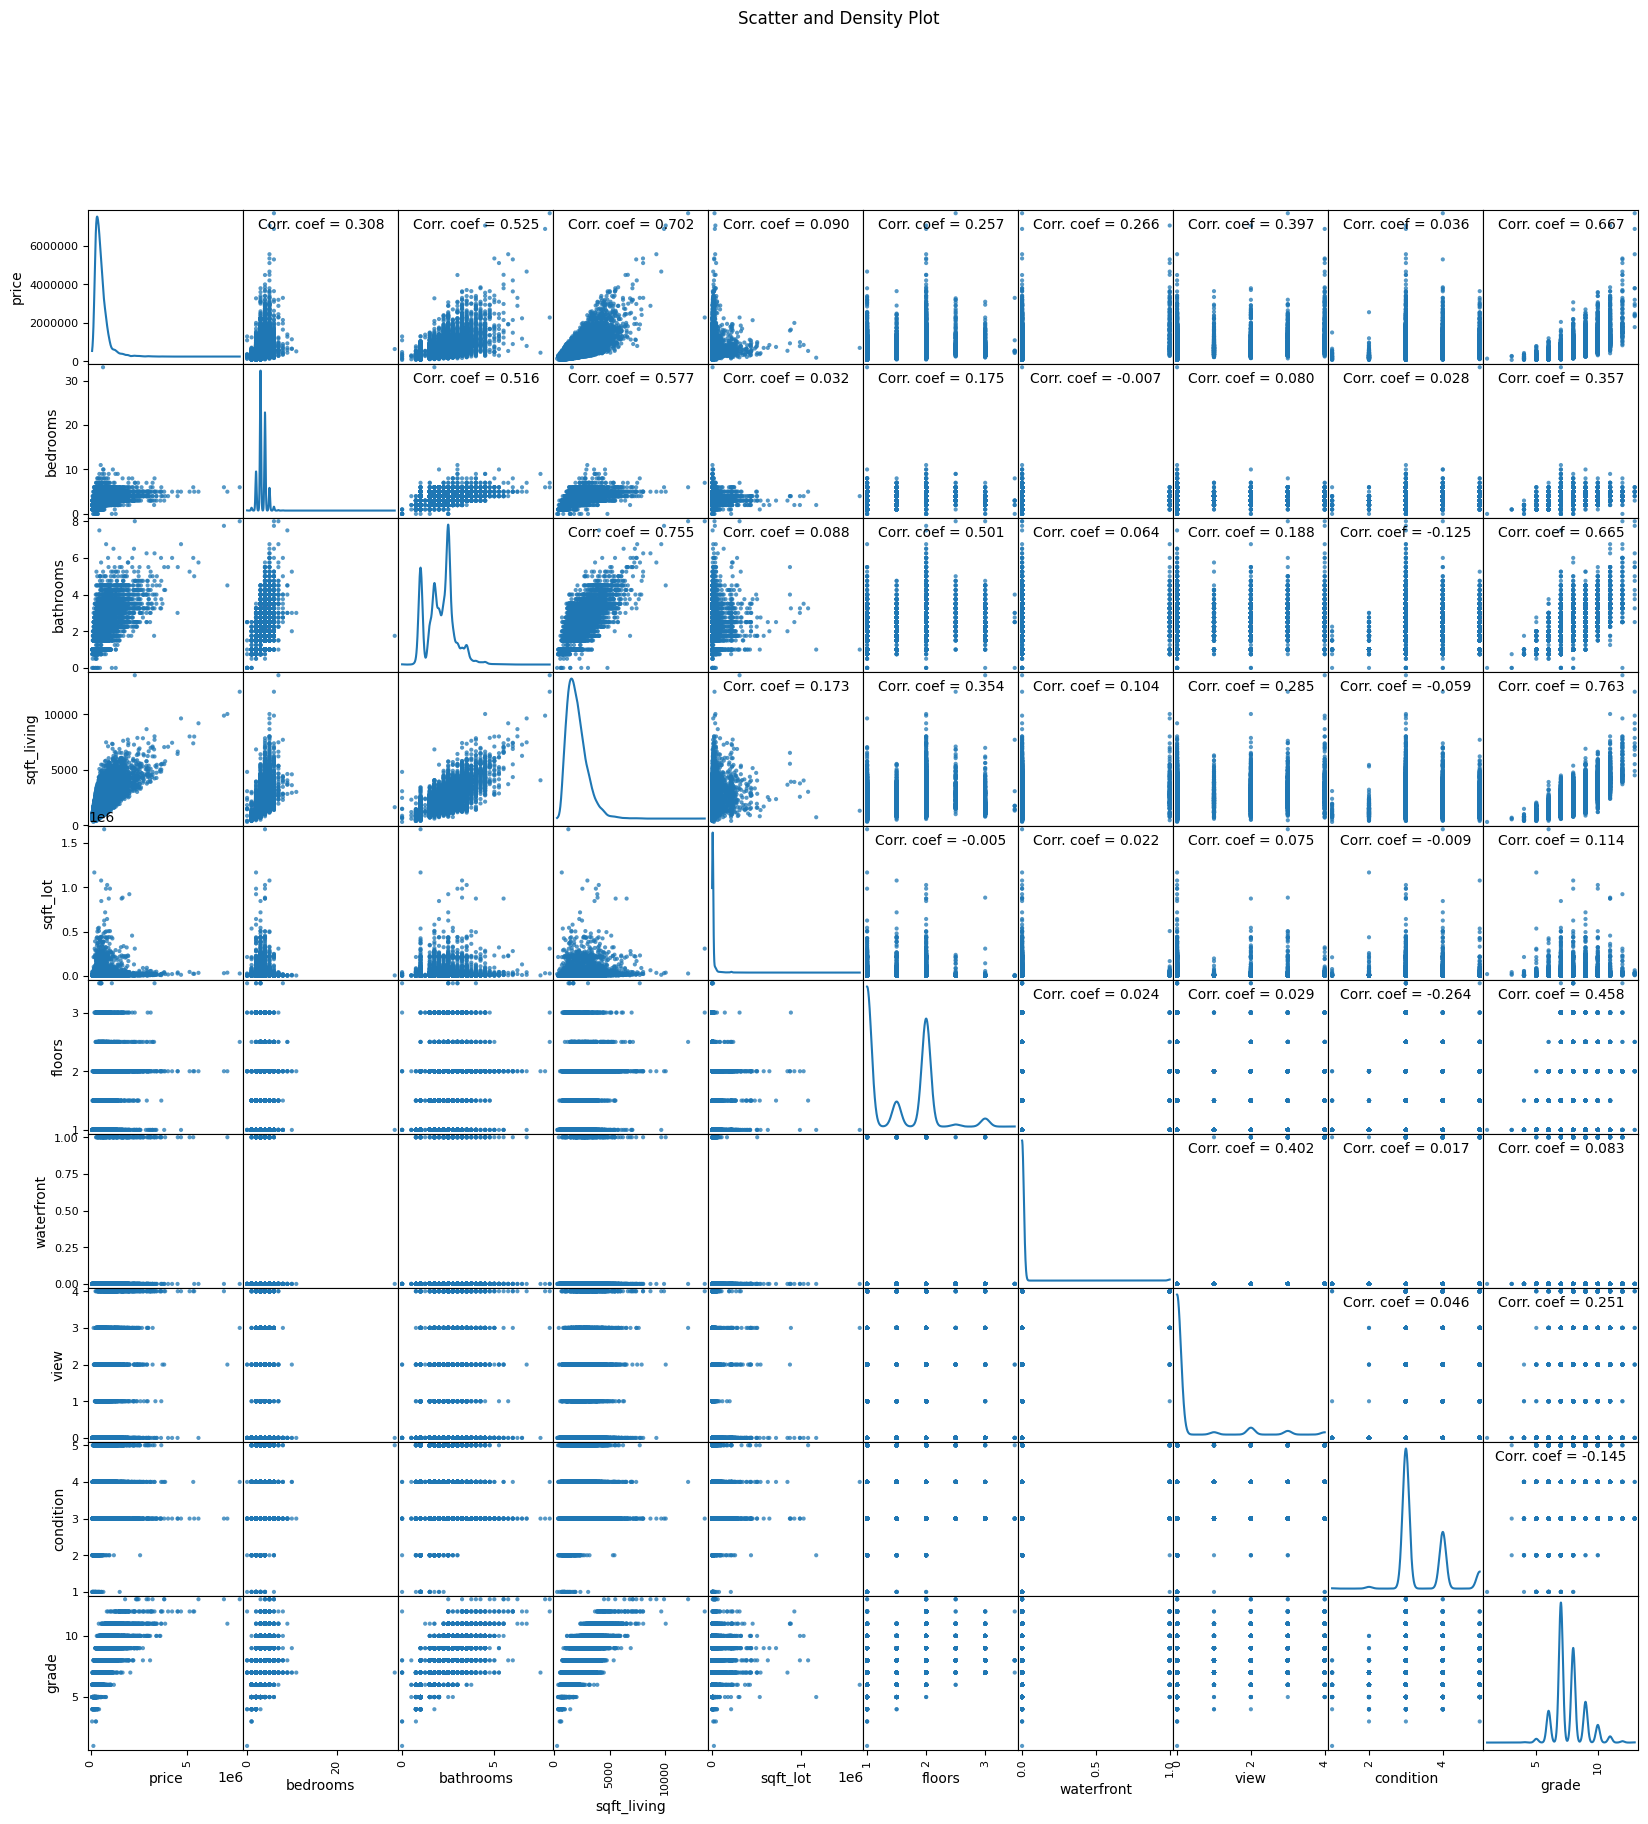

In [ ]:
plotScatterMatrix(df, 20, 10)

Есть зависимость price от параметров  : bedrooms, bathrooms, sqft_living,sqft_lot. Также у этих параметров (bedrooms, bathrooms, sqft_living, sqft_lot) наблюдается зависимость друг от друга. В остальных случаях очень слабые зависимости.

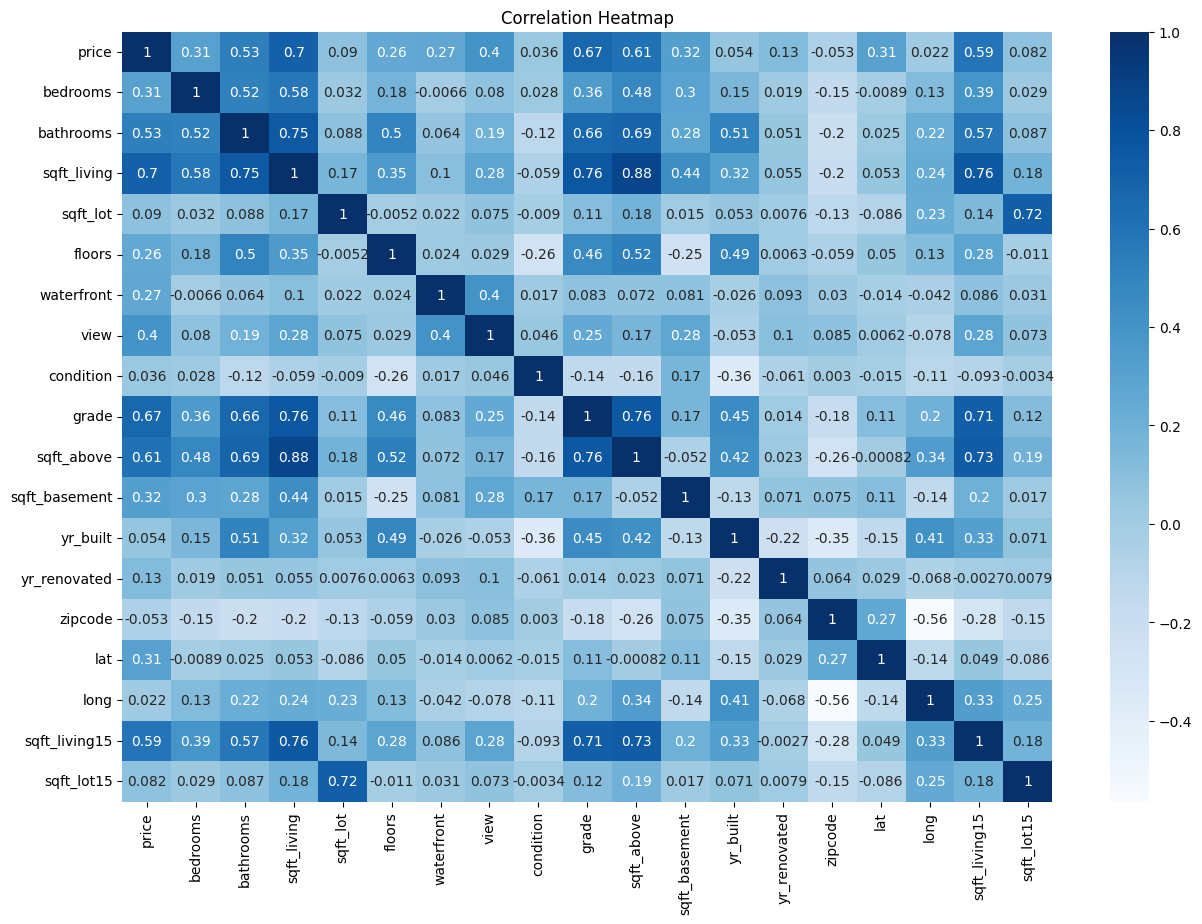

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()

Присутствует большое кол-во признаков со средней корреляций отнисительно price: (bedrooms, bathrooms, view, grade, sqft_above, sqft_basement, lat, sqft_living15) и один параметр sqft_living который очень сильно коррелирует с price

Проверим наличие выбросов в наших данных

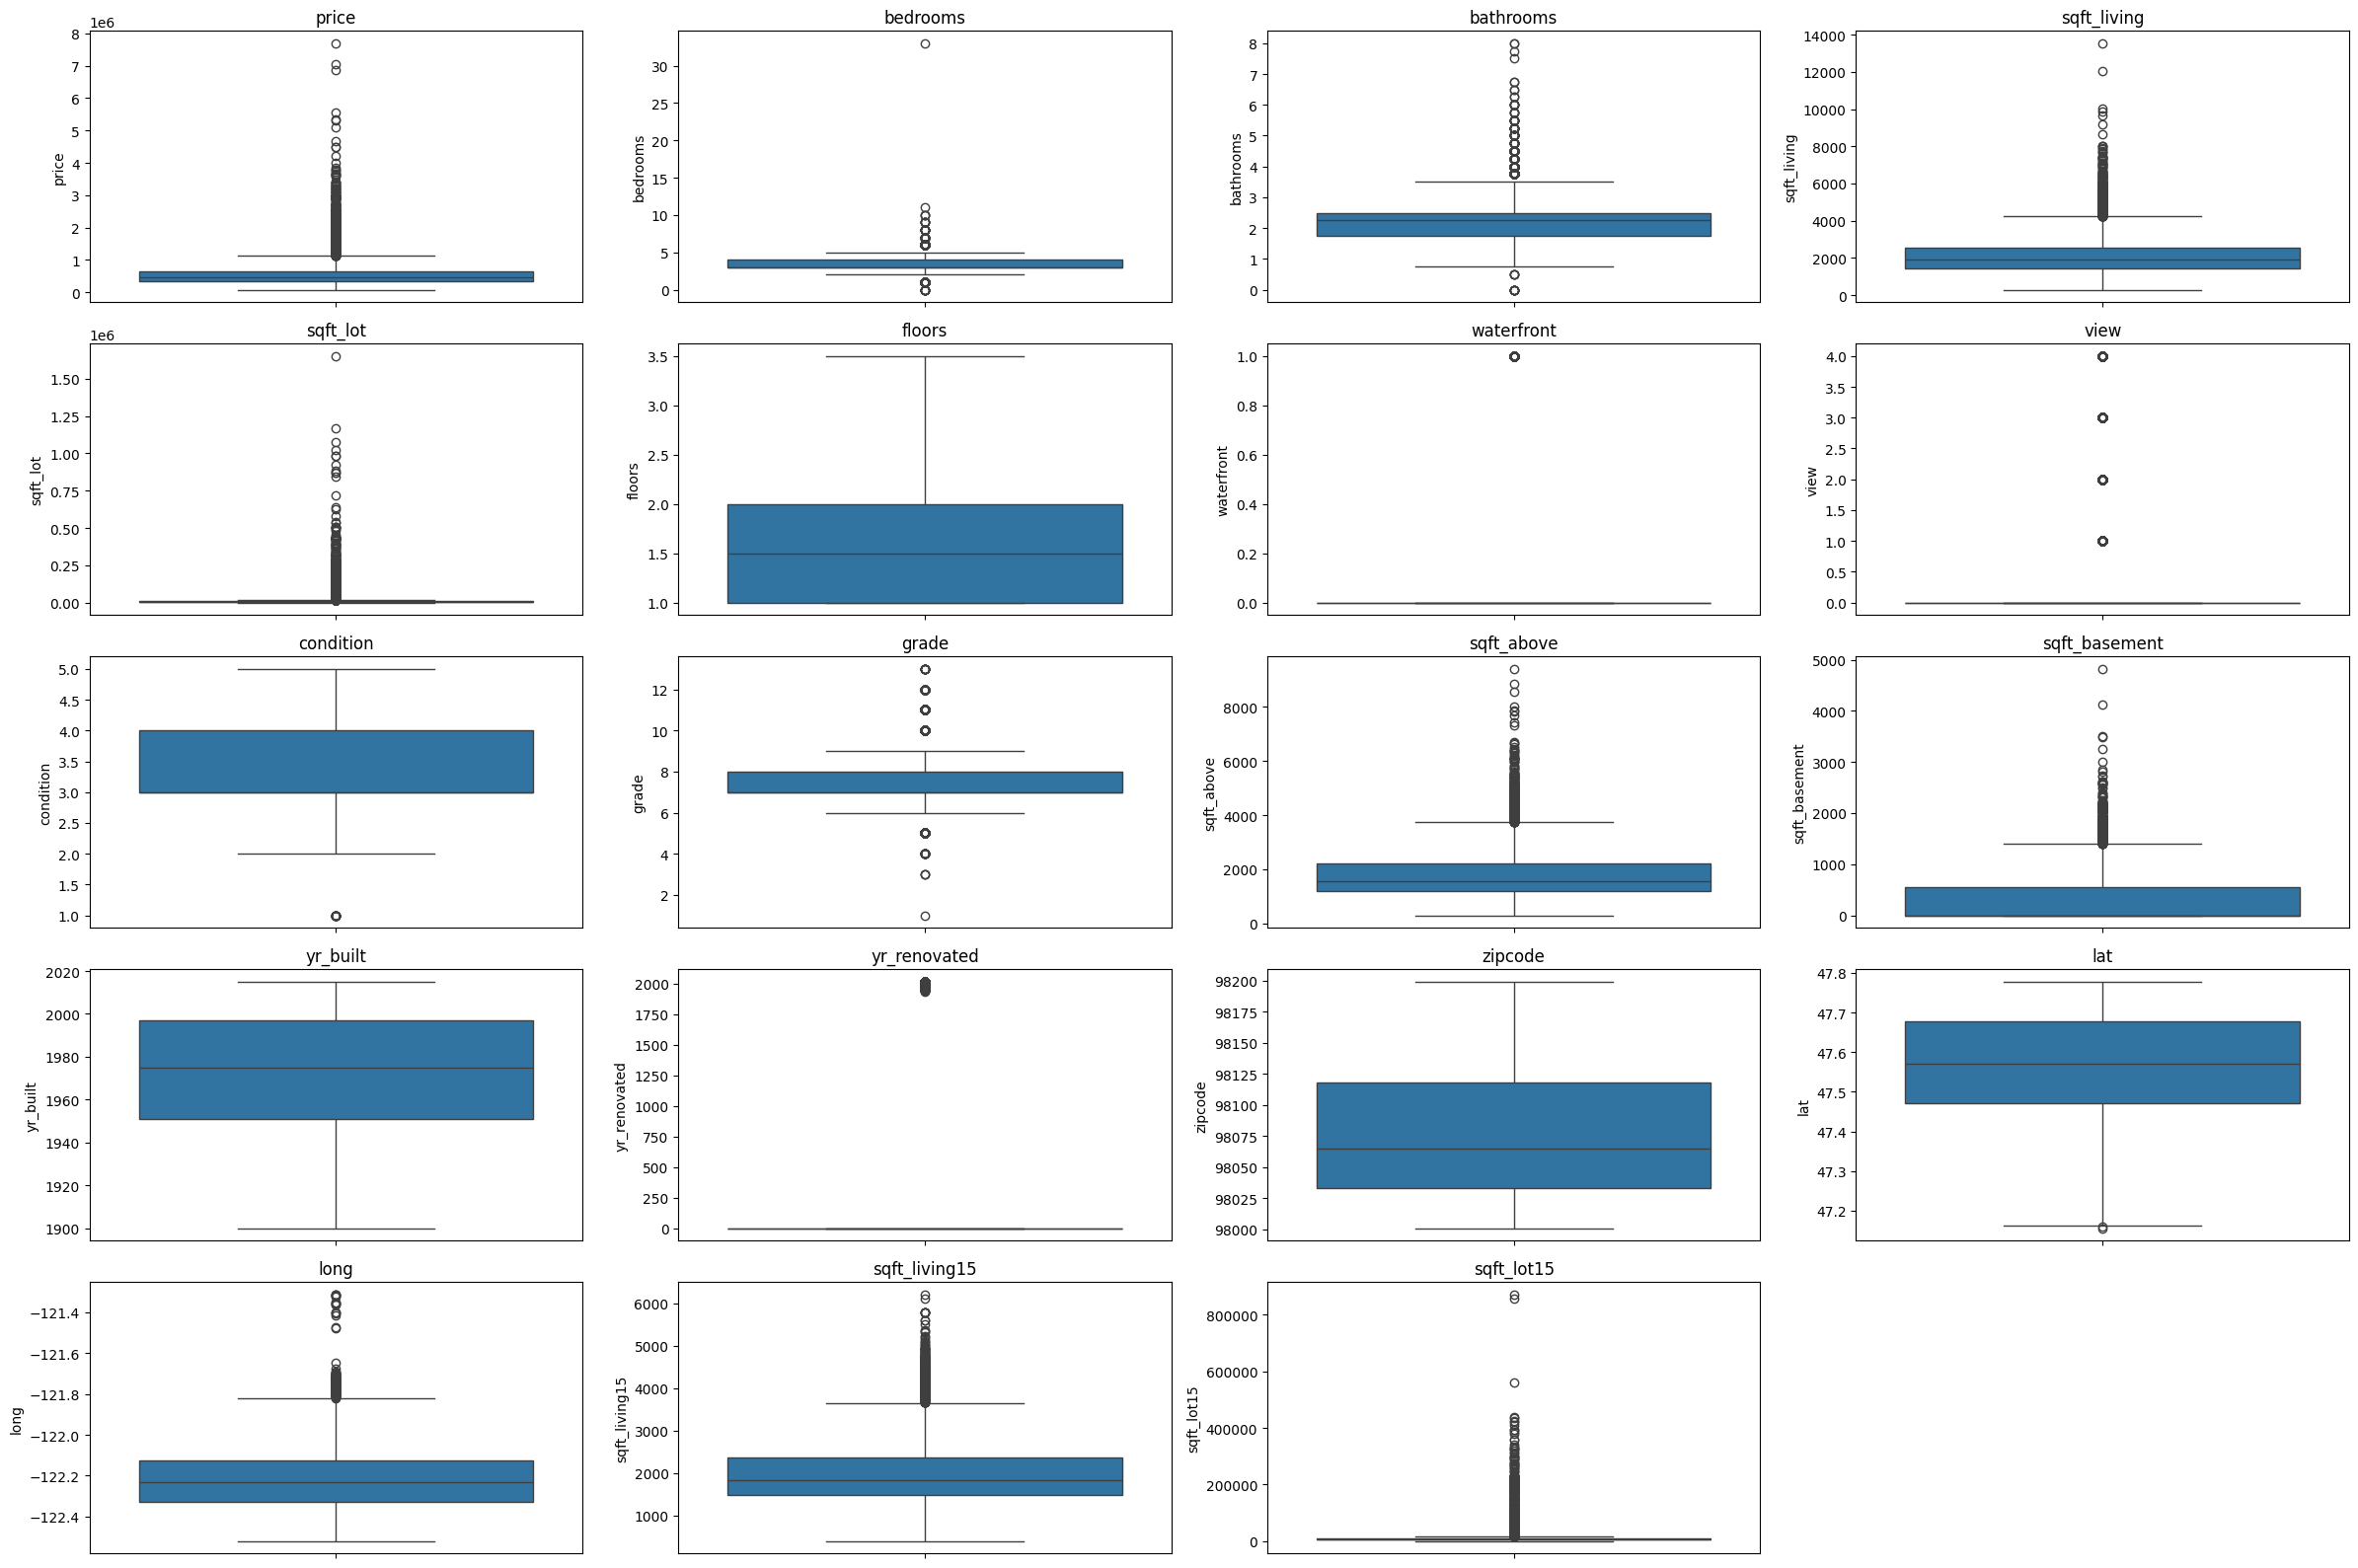

In [ ]:
plt.figure(figsize=(24, 16))
for feature in df.columns.to_list():
    plt.subplot(5, 4, df.columns.to_list().index(feature)+1)
    sns.boxplot(data=df[feature])
    plt.title(feature)
plt.tight_layout()
plt.show()

У нас наблюдается большое количество выбросов

Удалим выбросы

In [ ]:
numeric_columns = df.drop(["waterfront","view","zipcode","yr_renovated","grade","condition","floors","bathrooms","bedrooms"],axis=1).select_dtypes(include=['float64', 'int64']).columns
numeric_data = df[numeric_columns]

In [ ]:
index_list = []
for featsure in numeric_columns:
    index_list.extend(outliers(df,featsure))

In [ ]:
df = remove(df,index_list)

In [ ]:
df.shape

(17492, 19)

Данные после удаления выбросов

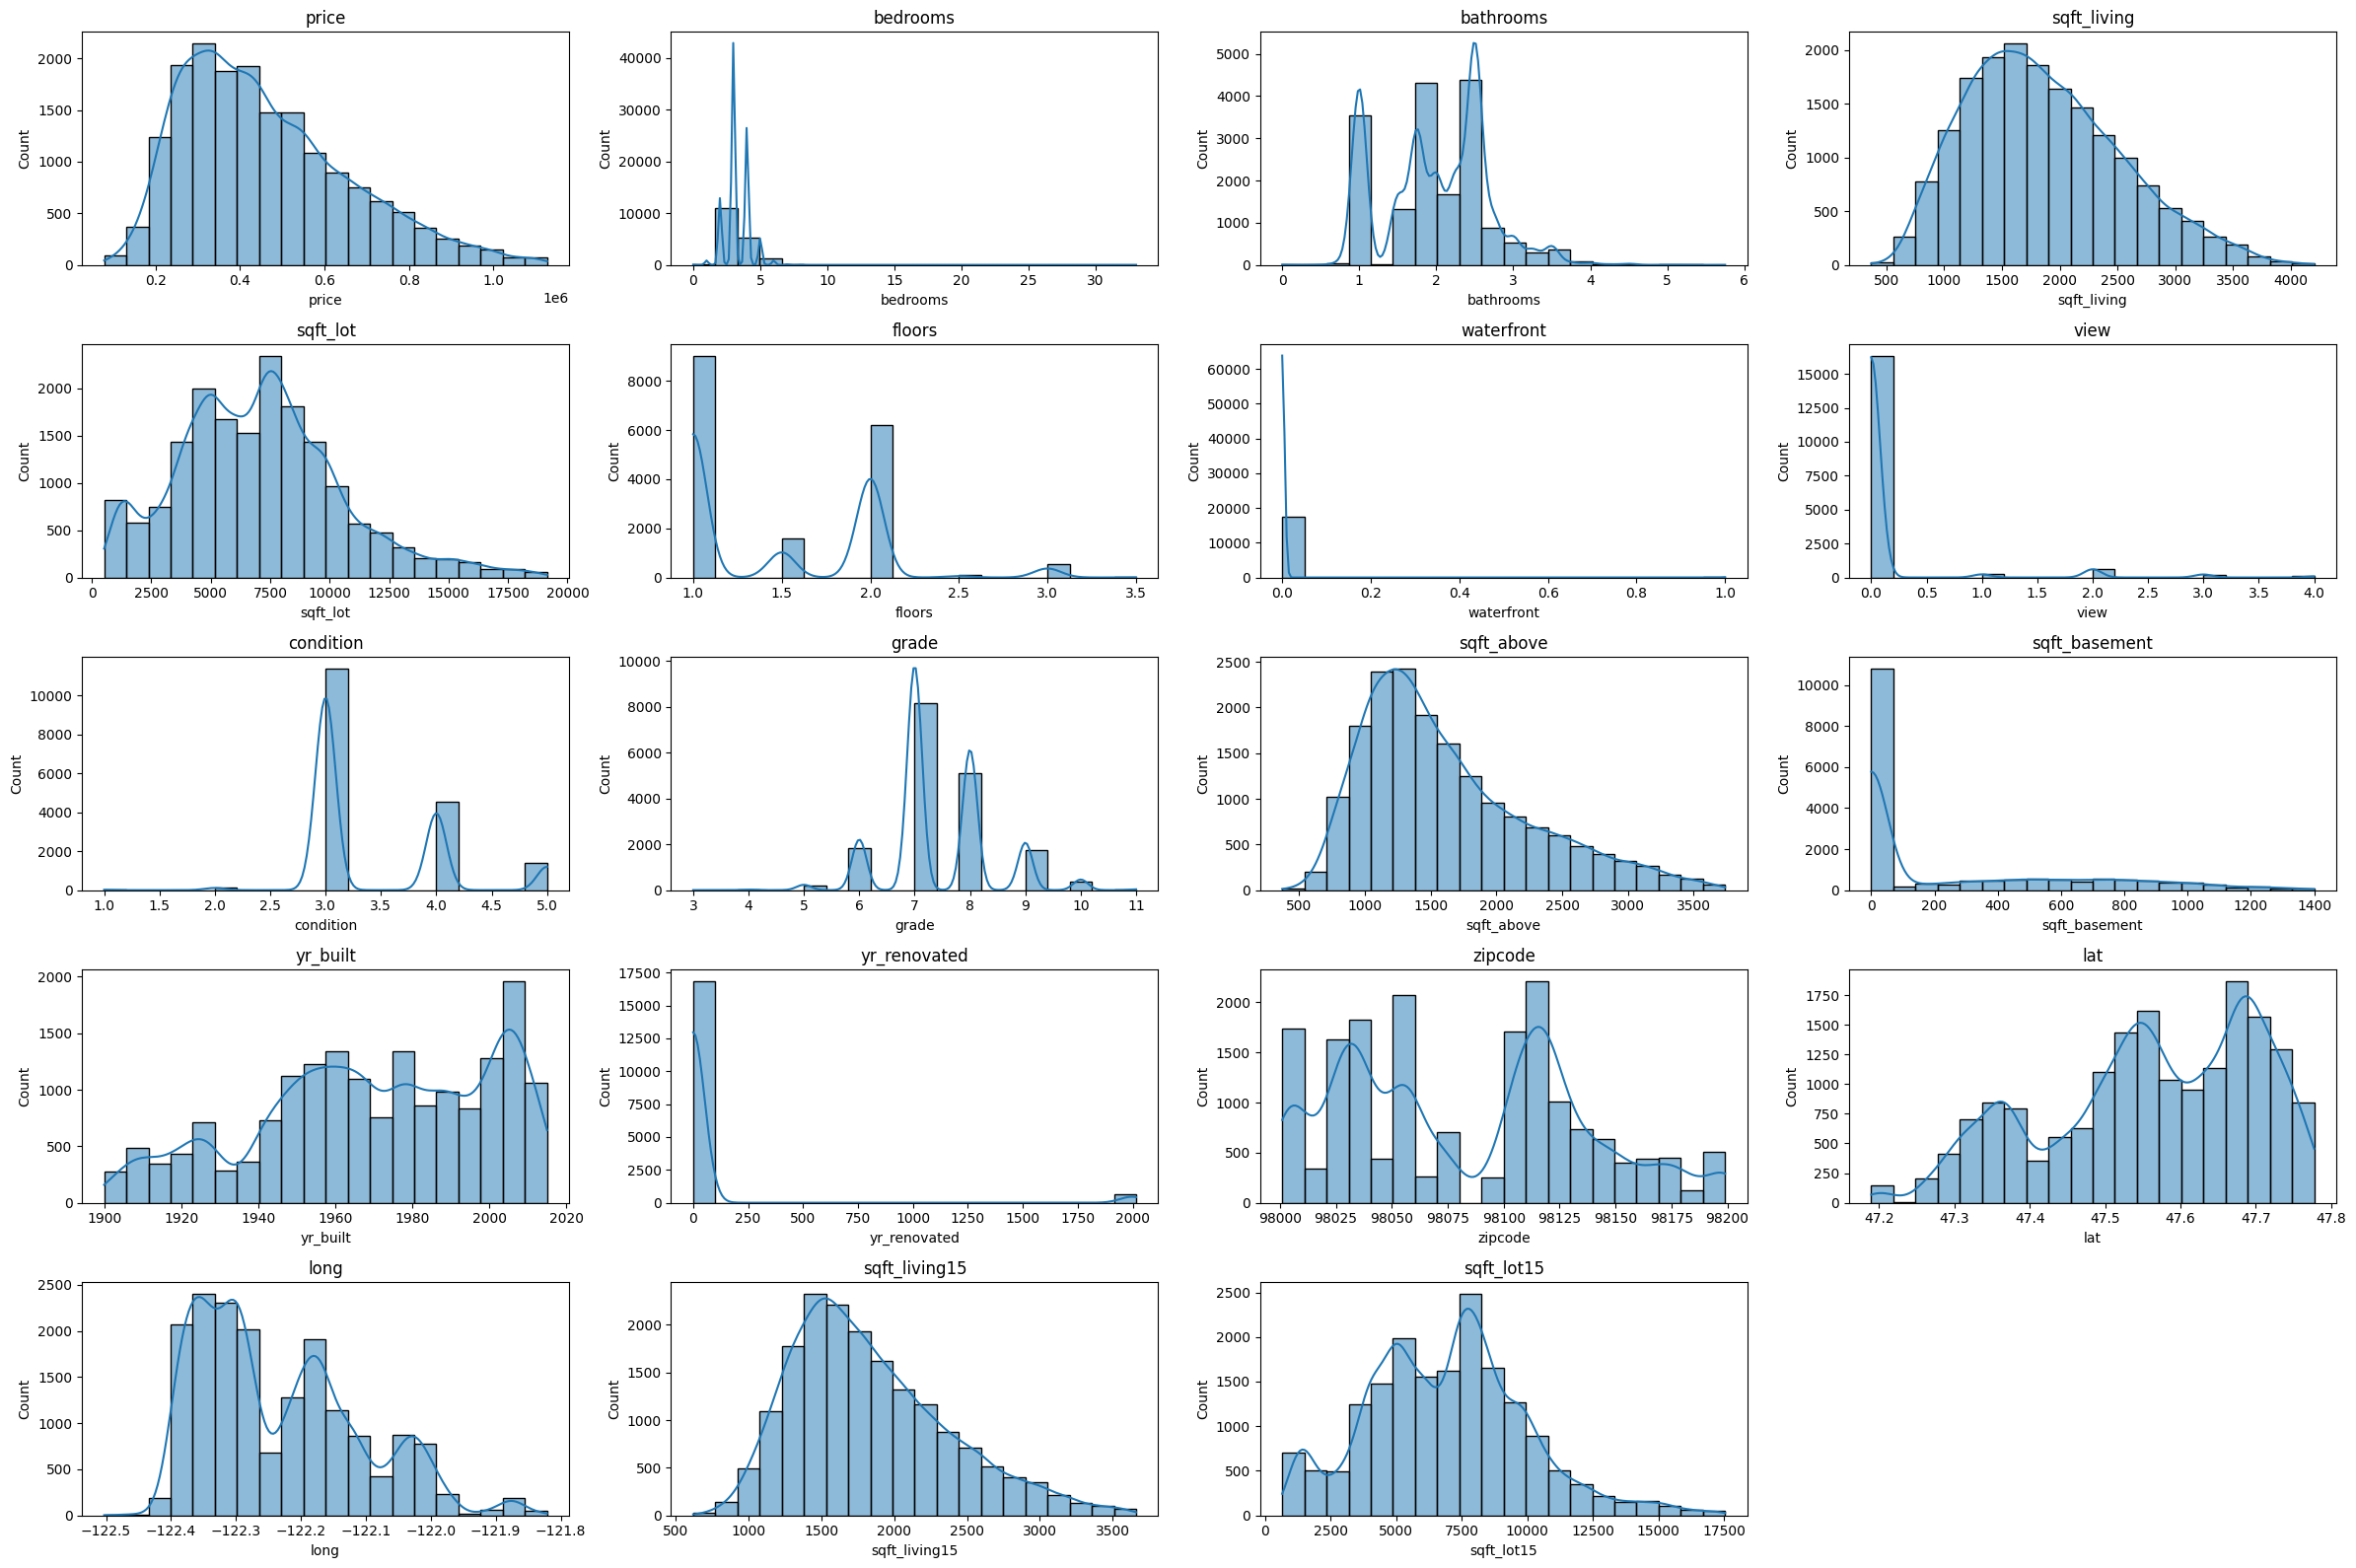

In [ ]:
plt.figure(figsize=(24, 16))
for feature in df.columns.to_list():
    plt.subplot(5, 4, df.columns.to_list().index(feature) + 1)
    sns.histplot(data=df[feature], bins=20, kde=True)
    plt.title(feature)
plt.tight_layout()
plt.show()

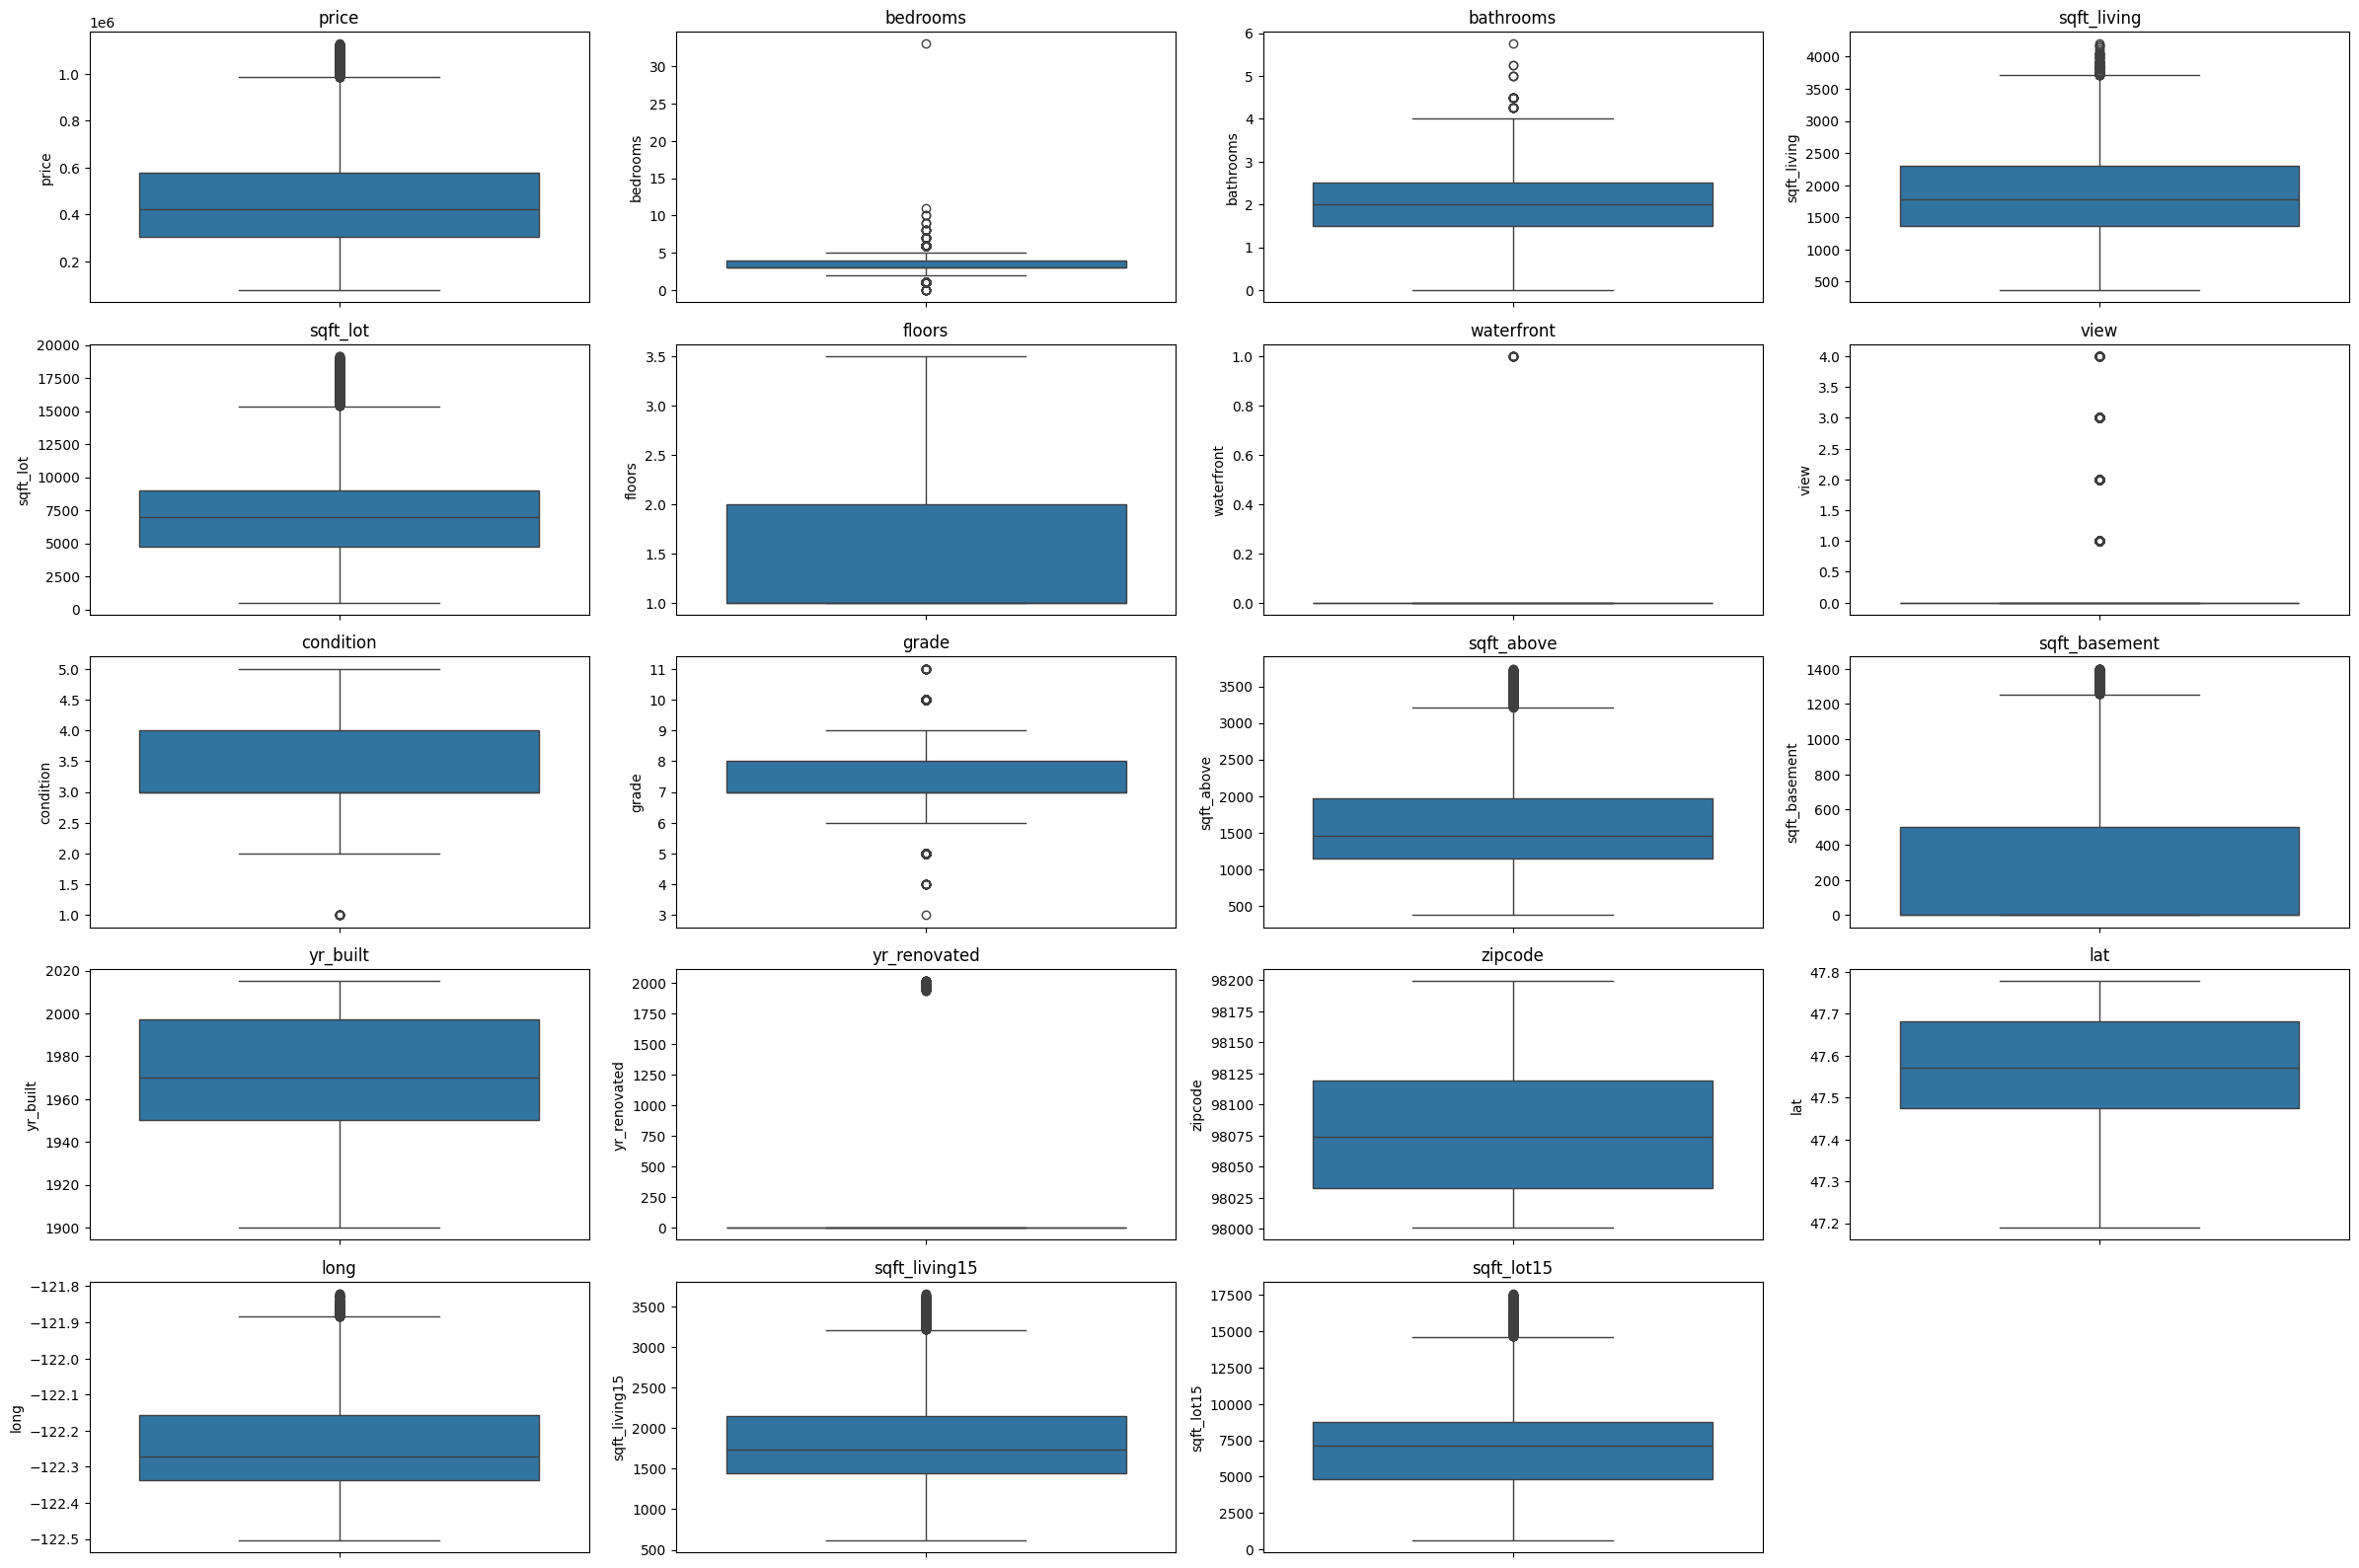

In [ ]:
plt.figure(figsize=(24, 16))
for feature in df.columns.to_list():
    plt.subplot(5, 4, df.columns.to_list().index(feature)+1)
    sns.boxplot(data=df[feature])
    plt.title(feature)
plt.tight_layout()
plt.show()

Выбросов значительно меньше. Теперь можно построить матрицу корреляции вновь и посмотреть на изменения

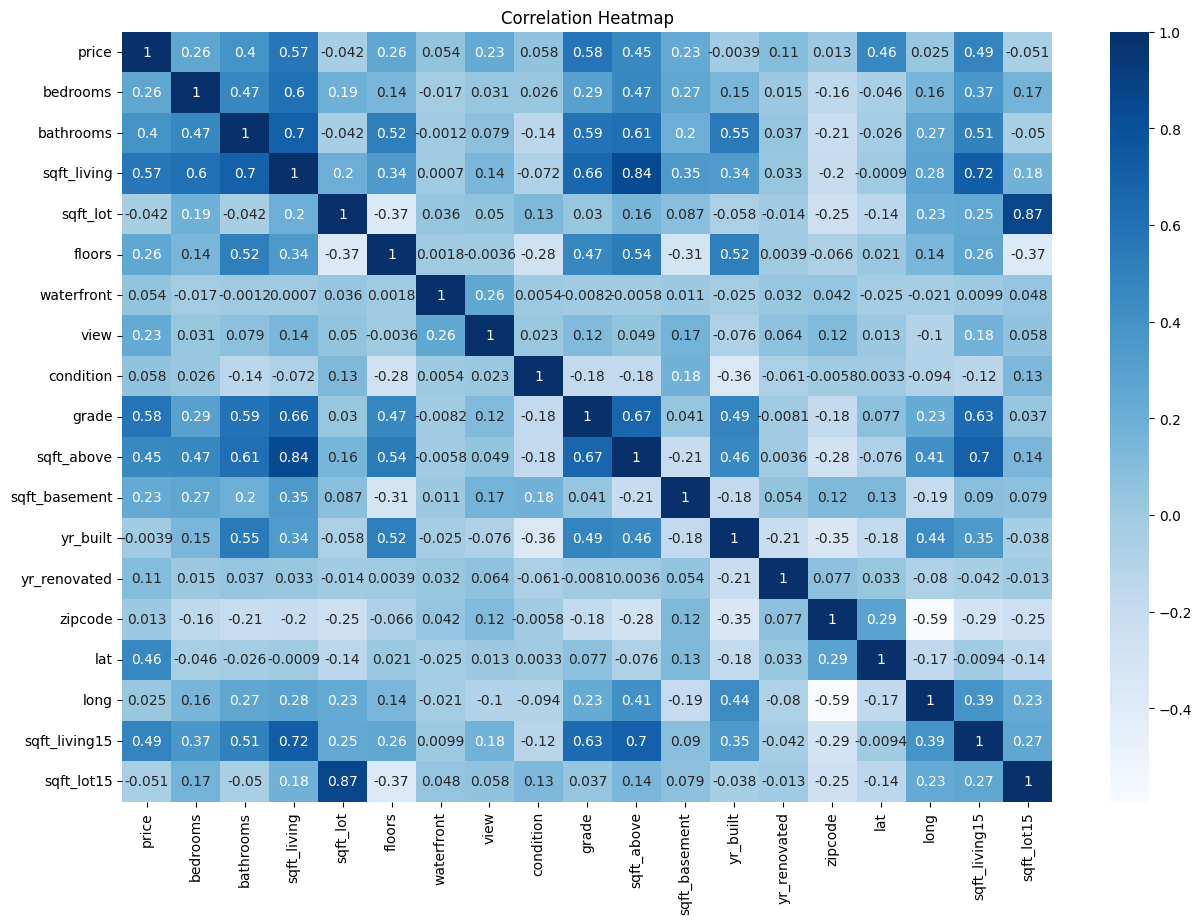

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()

По итогу с ценой неплохо коррелируют такие признаки: bathrooms, sqft_living, grade, sqft_above, lat, sqft_living15, параметры с меньшей корреляцией можно использовать но они будут менее значимыми




# 2 блок

In [ ]:
correlation = df.corr()['price'].drop('price')
correlation.sort_values(ascending=False)

<ipython-input-73-203ba4a59dba>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()['price'].drop('price')  # Вычисляем корреляцию с ценой и удаляем корреляцию с самой собой


sqft_living        0.702035
grade              0.667434
sqft_above         0.605567
sqft_living15      0.585379
bathrooms          0.525138
view               0.397293
sqft_basement      0.323816
bedrooms           0.308350
lat                0.307003
waterfront         0.266369
floors             0.256794
yr_renovated       0.126434
sqft_lot           0.089661
sqft_lot15         0.082447
yr_built           0.054012
condition          0.036362
long               0.021626
id                -0.016762
zipcode           -0.053203
corr_with_price         NaN
corr_with_price         NaN
Name: price, dtype: float64

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import tree, linear_model
from sklearn.model_selection import train_test_split
import xgboost
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import explained_variance_score

In [ ]:
df_train=df.copy()
df_train.rename(columns ={'price': 'SalePrice'}, inplace =True)

In [ ]:
new_data = df_train[['sqft_living','grade', 'sqft_above', 'sqft_living15','bathrooms','view','sqft_basement','waterfront','yr_built','lat','bedrooms','long']]

In [ ]:
#2 new_data = df_train[['sqft_living','grade', 'sqft_above', 'sqft_living15','bathrooms','lat','bedrooms']]

In [ ]:
X = new_data.values
y = df_train.SalePrice.values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.2)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rand_regr = RandomForestRegressor(n_estimators=400,random_state=0)
rand_regr.fit(X_train, y_train)
random=rand_regr.score(X_test,y_test)
predictions = rand_regr.predict(X_test)

In [ ]:
params = {'n_estimators':200,
          'max_depth':12,
          'criterion':'squared_error',
          'learning_rate':0.03,
          'min_samples_leaf':16,
          'min_samples_split':16
          }

In [ ]:

from sklearn.metrics import mean_squared_error,r2_score

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
### Тренируем
gbr = GradientBoostingRegressor(**params)
gbr.fit(X_train,y_train)


### Вычисляем точность
train_accuracy_score=gbr.score(X_train,y_train)
print(train_accuracy_score)

test_accuracy_score=gbr.score(X_test,y_test)
print(test_accuracy_score)

### Предсказание
y_pred = gbr.predict(X_test)

### И среднеквадратичную ошибку
mse = mean_squared_error(y_test,y_pred)
print("MSE: %.2f" % mse)
print(r2_score(y_test,y_pred))

0.9616701108735148
0.8633672664305072
MSE: 20805453894.17
0.8633672664305072


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
est=GradientBoostingRegressor(n_estimators=400, max_depth=5,min_samples_split=2,learning_rate=0.1).fit(X_train, y_train)
gradient=est.score(X_test,y_test)

pred = est.predict(X_test)

In [ ]:
models_cross = pd.DataFrame({
    'Model': ['Gradient Boosting','Random Forest'],
    'Score': [gradient,random]})

models_cross.sort_values(by='Score', ascending=False)

Model     Score
0  Gradient Boosting  0.821989
1      Random Forest  0.820896



---



/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


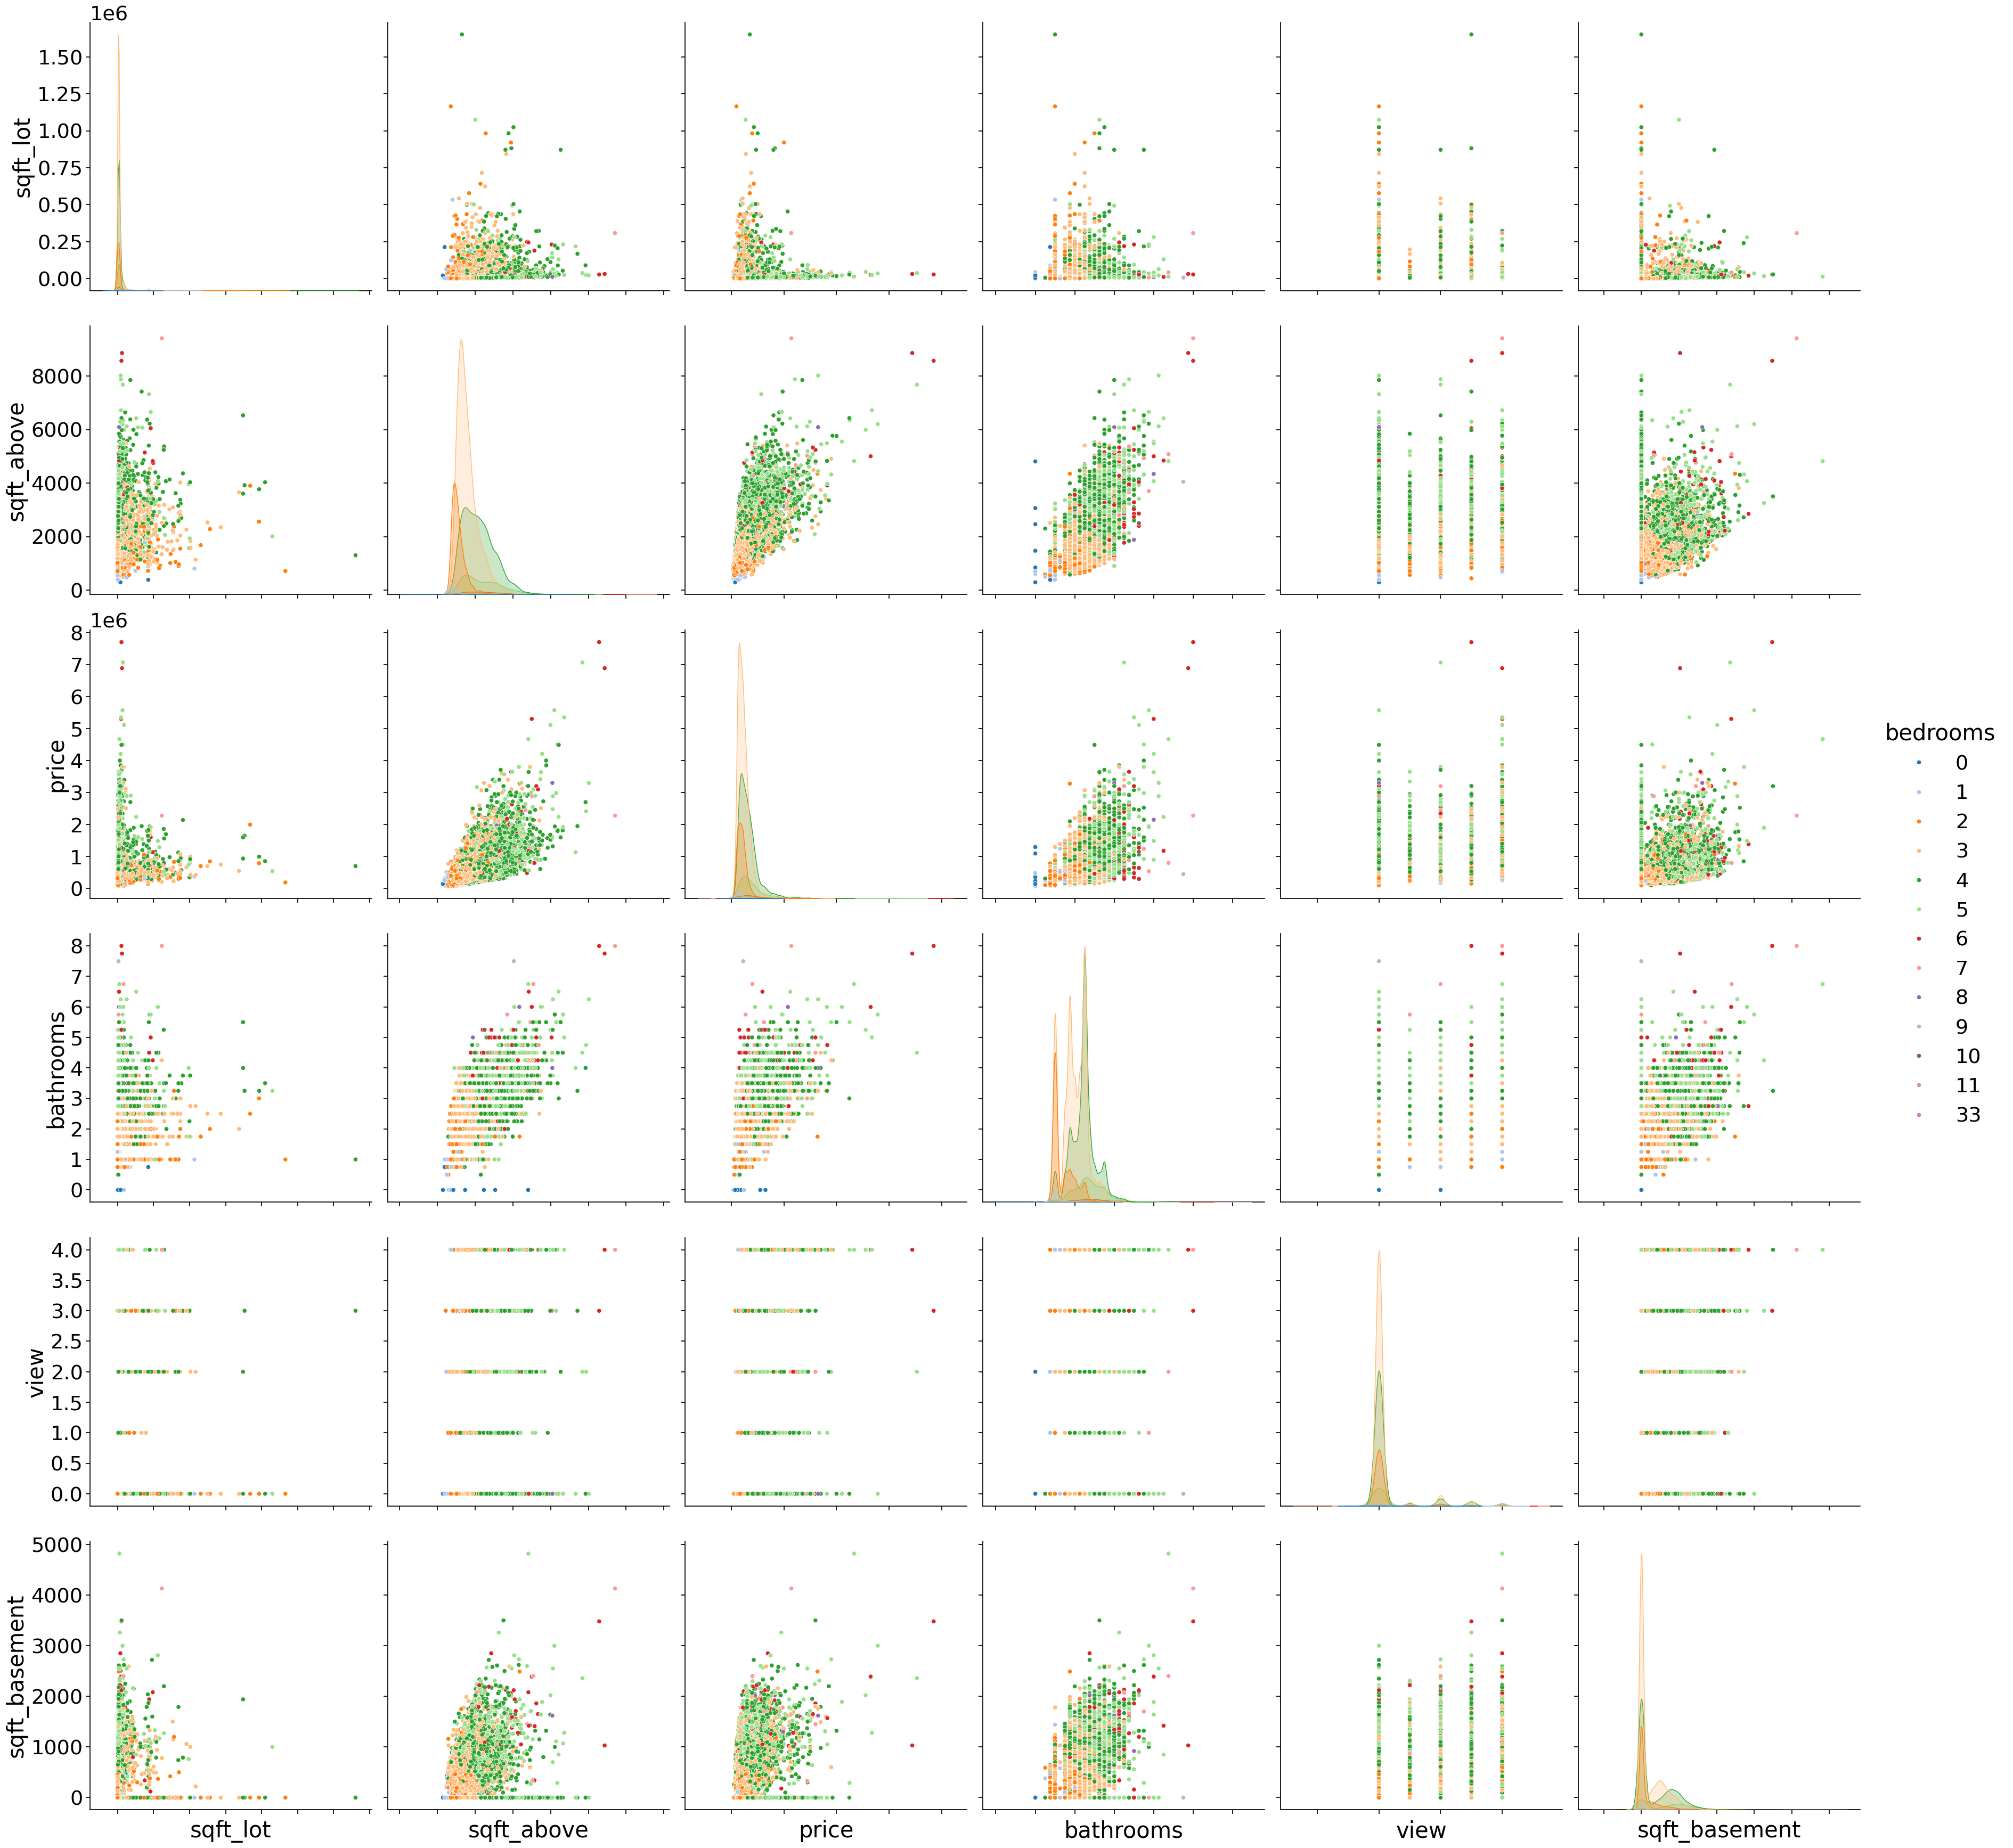

In [ ]:
import seaborn as sns

with sns.plotting_context("notebook",font_scale=2.5):
    g = sns.pairplot(df[['sqft_lot','sqft_above','price','bathrooms', 'view','sqft_basement', 'bedrooms']],
                 hue='bedrooms', palette='tab20',size=6)
g.set(xticklabels=[]);

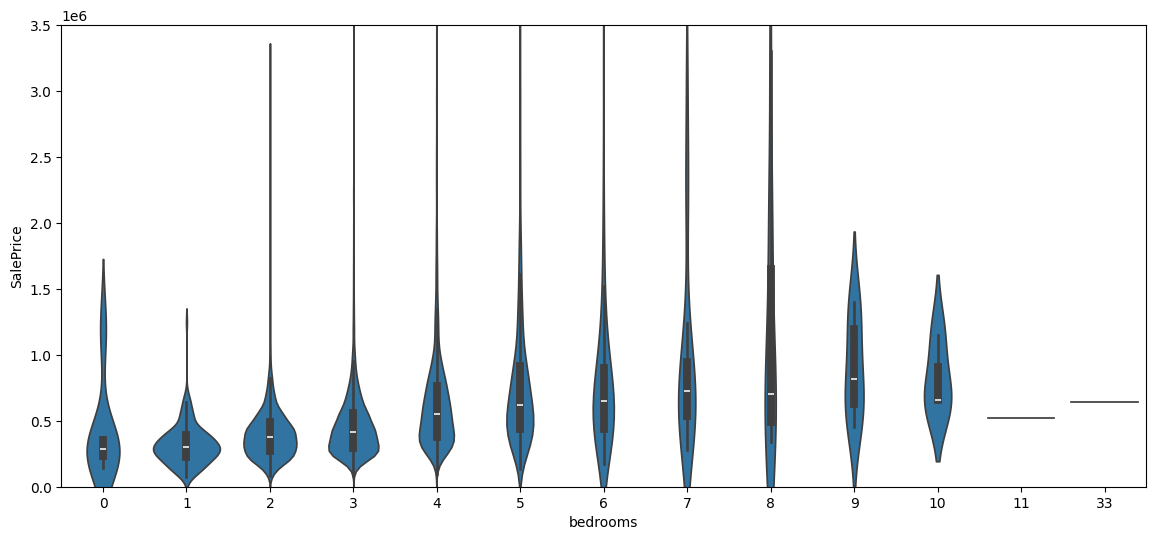

In [ ]:
var = 'bedrooms'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(14, 6))
fig = sns.violinplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=3500000);

# Новый раздел

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from sklearn.linear_model import Lasso
from sklearn.pipeline import make_pipeline

In [ ]:
# полная: drop_columns = ['sqft_lot', 'sqft_lot15', 'sqft_living', 'sqft_living15', 'yr_built', 'yr_renovated', 'zipcode', 'long', 'condition']
# drop_columns = ['sqft_lot', 'sqft_lot15', 'sqft_living', 'sqft_living15', 'yr_built', 'yr_renovated', 'sqft_above']
# drop_columns = ['sqft_lot15', 'sqft_living']
# drop_columns = ['sqft_lot15', 'sqft_living', 'waterfront']
drop_columns = ['sqft_lot15', 'sqft_living', 'zipcode', 'waterfront'] #лучшее
# drop_columns = ['sqft_lot15', 'sqft_living', 'zipcode', 'waterfront', 'view']
# drop_columns = ['sqft_lot15', 'sqft_living', 'zipcode', 'sqft_lot', 'waterfront', 'condition', 'yr_built', 'yr_renovated', 'long', 'lat']
df_for_poly = df.drop(columns=drop_columns)

#df_for_poly = df[['price', 'bedrooms', 'bathrooms', 'sqft_lot', 'sqft_living']]
df_for_poly

price  bedrooms  bathrooms  sqft_lot  floors  view  condition  \
0      221900.0         3       1.00      5650     1.0     0          3   
1      538000.0         3       2.25      7242     2.0     0          3   
2      180000.0         2       1.00     10000     1.0     0          3   
3      604000.0         4       3.00      5000     1.0     0          5   
4      510000.0         3       2.00      8080     1.0     0          3   
...         ...       ...        ...       ...     ...   ...        ...   
21608  360000.0         3       2.50      1131     3.0     0          3   
21609  400000.0         4       2.50      5813     2.0     0          3   
21610  402101.0         2       0.75      1350     2.0     0          3   
21611  400000.0         3       2.50      2388     2.0     0          3   
21612  325000.0         2       0.75      1076     2.0     0          3   

       grade  sqft_above  sqft_basement  yr_built  yr_renovated      lat  \
0          7        1180              0      1955             0  47.5112   
1          7        2170            400      1951          1991  47.7210   
2          6         770              0      1933             0  47.7379   
3          7        1050            910      1965             0  47.5208   
4          8        1680              0      1987             0  47.6168   
...      ...         ...            ...       ...           ...      ...   
21608      8        1530              0      2009             0  47.6993   
21609      8        2310              0      2014             0  47.5107   
21610      7        1020              0      2009             0  47.5944   
21611      8        1600              0      2004             0  47.5345   
21612      7        1020              0      2008             0  47.5941   

          long  sqft_living15  
0     -122.257           1340  
1     -122.319           1690  
2     -122.233           2720  
3     -122.393           1360  
4     -122.045           1800  
...        ...            ...  
21608 -122.346           1530  
21609 -122.362           1830  
21610 -122.299           1020  
21611 -122.069           1410  
21612 -122.299           1020  

[17492 rows x 15 columns]

In [ ]:
# df_for_poly = df

In [ ]:
h_X=df_for_poly.loc[:, ~df_for_poly.columns.isin(['price'])]
h_y=df_for_poly['price']
X_train, X_test, y_train, y_test = train_test_split(h_X, h_y, test_size=0.3) # 0.3

In [ ]:
x_train_norm = pd.DataFrame(MinMaxScaler().fit_transform(X_train), columns=X_train.columns)
x_test_norm = pd.DataFrame(MinMaxScaler().fit_transform(X_test), columns=X_test.columns)

2 cтепень

In [ ]:
polynom_d2 = PolynomialFeatures(degree=4)
X_train_polynom = polynom_d2.fit_transform(x_train_norm)
X_test_polynom = polynom_d2.transform(x_test_norm)

model_polynom_d2 = LinearRegression()
model_polynom_d2.fit(X_train_polynom, y_train)
# Проверяем
y_predict_d2 = model_polynom_d2.predict(X_test_polynom)

mse = mean_squared_error(y_test, y_predict_d2)
r2 = r2_score(y_test, y_predict_d2)

mse_formatted = "%.4g" % mse
r2_formatted = "%.4g" % r2
print("MSE:", mse_formatted)
print("R2:", r2_formatted)

MSE: 2.232e+28
R2: -5.876e+17


In [ ]:
y_predict_d2_train = model_polynom_d2.predict(X_train_polynom)

mse = mean_squared_error(y_train, y_predict_d2_train)
r2 = r2_score(y_train, y_predict_d2_train)

mse_formatted = "%.4g" % mse
r2_formatted = "%.4g" % r2
print("MSE:", mse_formatted)
print("R2:", r2_formatted)

MSE: 4.055e+09
R2: 0.8977


In [ ]:
# Лассо
model_polynom_lasso = make_pipeline(PolynomialFeatures(degree=2), Lasso(alpha = 1.0))
model_polynom_lasso.fit(X_train_polynom, y_train)
#lasso_reg.fit(X_train, y_train)
y_predict_d2_lasso = model_polynom_lasso.predict(X_test_polynom)
y_predict_d2_lasso_train = model_polynom_lasso.predict(X_train_polynom)
print("MSE", mean_squared_error(y_train, y_predict_d2_lasso_train), mean_squared_error(y_test, y_predict_d2_lasso))
print("R2", r2_score(y_train, y_predict_d2_lasso_train), r2_score(y_test, y_predict_d2_lasso))

KeyboardInterrupt: 

In [ ]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Предположим, что df - это ваш DataFrame с признаками
# Если ваши признаки содержат категориальные переменные, преобразуйте их в дамми-переменные

# Добавьте константу к данным (для модели без свободного члена)
df_with_const = add_constant(df)

# Рассчитайте VIF для каждого признака
vif_data = pd.DataFrame()
vif_data["Feature"] = df_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(df_with_const.values, i) for i in range(df_with_const.shape[1])]

print(vif_data)


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


          Feature           VIF
0           const  4.587047e+06
1           price  3.330527e+00
2        bedrooms  1.679407e+00
3       bathrooms  3.375605e+00
4     sqft_living           inf
5        sqft_lot  2.103223e+00
6          floors  2.012230e+00
7      waterfront  1.266624e+00
8            view  1.475723e+00
9       condition  1.256760e+00
10          grade  3.730985e+00
11     sqft_above           inf
12  sqft_basement           inf
13       yr_built  2.577024e+00
14   yr_renovated  1.152119e+00
15        zipcode  1.686170e+00
16            lat  1.352995e+00
17           long  1.848176e+00
18  sqft_living15  2.985170e+00
19     sqft_lot15  2.138365e+00


# Новый раздел

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import tree, linear_model
import xgboost
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import explained_variance_score

df1 = df.copy()
#df1.drop("price",axis=1,inplace=True)
drop_columns = ['sqft_lot', 'floors', 'condition', 'yr_built',
       'yr_renovated', 'zipcode', 'long', 'sqft_lot15']


df_for_poly = df1.drop(columns=drop_columns)
print(df_for_poly.columns)
print(', '.join(df_for_poly.columns))

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'waterfront', 'view', 'grade', 'sqft_above', 'sqft_basement', 'lat',
       'sqft_living15'],
      dtype='object')
id, date, price, bedrooms, bathrooms, sqft_living, waterfront, view, grade, sqft_above, sqft_basement, lat, sqft_living15


In [ ]:
df

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0      221900.0         3       1.00         1180      5650     1.0   
1      538000.0         3       2.25         2570      7242     2.0   
2      180000.0         2       1.00          770     10000     1.0   
3      604000.0         4       3.00         1960      5000     1.0   
4      510000.0         3       2.00         1680      8080     1.0   
...         ...       ...        ...          ...       ...     ...   
21608  360000.0         3       2.50         1530      1131     3.0   
21609  400000.0         4       2.50         2310      5813     2.0   
21610  402101.0         2       0.75         1020      1350     2.0   
21611  400000.0         3       2.50         1600      2388     2.0   
21612  325000.0         2       0.75         1020      1076     2.0   

       waterfront  view  condition  grade  sqft_above  sqft_basement  \
0               0     0          3      7        1180              0   
1               0     0          3      7        2170            400   
2               0     0          3      6         770              0   
3               0     0          5      7        1050            910   
4               0     0          3      8        1680              0   
...           ...   ...        ...    ...         ...            ...   
21608           0     0          3      8        1530              0   
21609           0     0          3      8        2310              0   
21610           0     0          3      7        1020              0   
21611           0     0          3      8        1600              0   
21612           0     0          3      7        1020              0   

       yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0          1955             0    98178  47.5112 -122.257           1340   
1          1951          1991    98125  47.7210 -122.319           1690   
2          1933             0    98028  47.7379 -122.233           2720   
3          1965             0    98136  47.5208 -122.393           1360   
4          1987             0    98074  47.6168 -122.045           1800   
...         ...           ...      ...      ...      ...            ...   
21608      2009             0    98103  47.6993 -122.346           1530   
21609      2014             0    98146  47.5107 -122.362           1830   
21610      2009             0    98144  47.5944 -122.299           1020   
21611      2004             0    98027  47.5345 -122.069           1410   
21612      2008             0    98144  47.5941 -122.299           1020   

       sqft_lot15  
0            5650  
1            7639  
2            8062  
3            5000  
4            7503  
...           ...  
21608        1509  
21609        7200  
21610        2007  
21611        1287  
21612        1357  

[21613 rows x 19 columns]

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Lasso
from sklearn.pipeline import make_pipeline

In [ ]:
drop_columns = ['sqft_lot15', 'sqft_living', 'zipcode', 'waterfront', 'id', 'date']
df_for_poly = df.drop(columns=drop_columns)
h_X=df_for_poly.loc[:, ~df_for_poly.columns.isin(['price'])]
h_y=df_for_poly['price']
X_train, X_test, y_train, y_test = train_test_split(h_X, h_y, test_size=0.3) # 0.3
x_train_norm = pd.DataFrame(MinMaxScaler().fit_transform(X_train), columns=X_train.columns)
x_test_norm = pd.DataFrame(MinMaxScaler().fit_transform(X_test), columns=X_test.columns)

In [ ]:
polynom_d2 = PolynomialFeatures(degree=3)
X_train_polynom = polynom_d2.fit_transform(x_train_norm)
X_test_polynom = polynom_d2.transform(x_test_norm)

model_polynom_d2 = LinearRegression()
model_polynom_d2.fit(X_train_polynom, y_train)

y_predict_d2 = model_polynom_d2.predict(X_test_polynom)
print("MSE", mean_squared_error(y_test, y_predict_d2))
print("R2", r2_score(y_test, y_predict_d2))

MSE 1071588643124.3901
R2 -6.3978584845406425




---



In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import numpy as np
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split

df = pd.read_csv('kc_house_data.csv')
df.drop("id",axis=1,inplace=True)
df.drop(['date'],axis=1,inplace=True)

In [ ]:
numeric_columns = df.drop(["waterfront","view","zipcode","yr_renovated","grade","condition","floors","bathrooms","bedrooms"],axis=1).select_dtypes(include=['float64', 'int64']).columns
numeric_data = df[numeric_columns]

index_list = []
for featsure in numeric_columns:
    index_list.extend(outliers(df,featsure))

df = remove(df,index_list)
df.shape

(17492, 19)

In [ ]:
df_train=df.copy()
df_train.rename(columns ={'price': 'SalePrice'}, inplace =True)

In [ ]:
# new_data = df_train
new_data = df_train[['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms', 'view', 'sqft_basement', 'bedrooms', 'lat', 'waterfront']]
#new_data = df_train[['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms']]


In [ ]:
new_data = df_train[['sqft_living', 'grade', 'lat']]

In [ ]:
X = new_data.values
y = df_train.SalePrice.values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor

params = {
    'n_estimators': 200,
    'max_depth': 6,
    'criterion':'squared_error',
    'learning_rate': 0.03,
    'min_samples_leaf': 16,
    'min_samples_split': 16
}

gbr = GradientBoostingRegressor(**params)
gbr.fit(X_train, y_train)

train_r2_score = gbr.score(X_train, y_train)
test_r2_score = gbr.score(X_test, y_test)
y_train_pred = gbr.predict(X_train)
y_test_pred = gbr.predict(X_test)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print("Train R^2 score: %.2f" % train_r2_score)
print("Test R^2 score: %.2f" % test_r2_score)
print("Train MSE: %.2f" % train_mse)
print("Test MSE: %.2f" % test_mse)

Train R^2 score: 0.87
Test R^2 score: 0.80
Train MSE: 5169468100.65
Test MSE: 7887286213.12


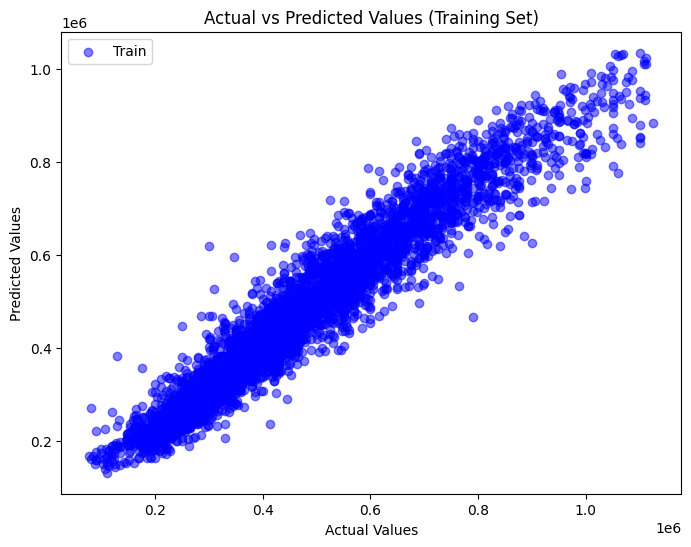

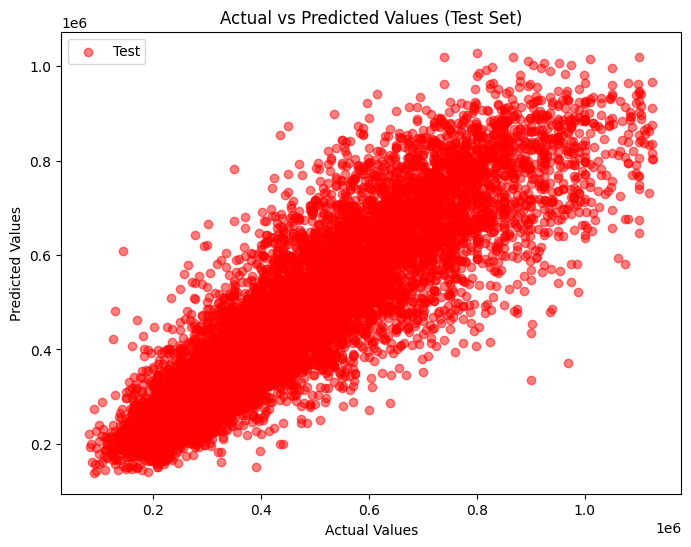

In [ ]:
# Scatter plot для тренировочных данных
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_train_pred, color='blue', alpha=0.5, label='Train')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Training Set)')
plt.legend()
plt.show()

# Scatter plot для тестовых данных
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, color='red', alpha=0.5, label='Test')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Test Set)')
plt.legend()
plt.show()

KeyboardInterrupt: 

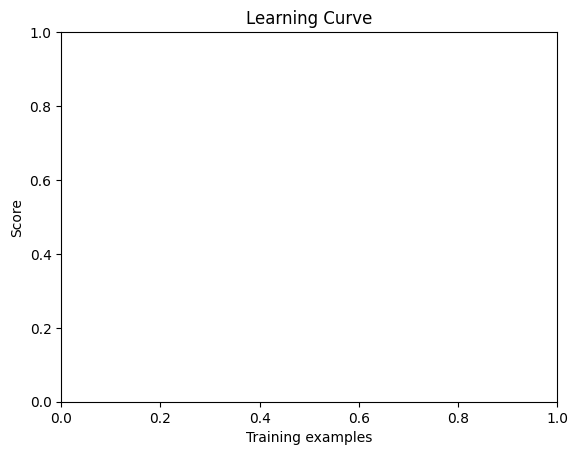

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve, cross_val_score, validation_curve
from sklearn.ensemble import GradientBoostingRegressor

# Функция для построения кривой обучения
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Функция для валидации по кросс-валидации
def cross_validation(estimator, X, y, param_name, param_range, scoring="neg_mean_absolute_error", cv=5):
    train_scores, test_scores = validation_curve(estimator, X, y, param_name=param_name, param_range=param_range,
                                                 scoring=scoring, cv=cv)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.title("Validation Curve")
    plt.xlabel(param_name)
    plt.ylabel("Score")  # Меняем пределы оси y в зависимости от используемой метрики
    lw = 2
    plt.plot(param_range, train_scores_mean, label="Training score",
                 color="darkorange", lw=lw)
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2,
                     color="darkorange", lw=lw)
    plt.plot(param_range, test_scores_mean, label="Cross-validation score",
                 color="navy", lw=lw)
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2,
                     color="navy", lw=lw)
    plt.legend(loc="best")
    plt.show()

# Создание модели градиентного бустинга
gbr = GradientBoostingRegressor(**params)

# Построение кривой обучения
plot_learning_curve(gbr, "Learning Curve", X_train, y_train, cv=5)

# Валидация по кросс-валидации для параметра max_depth
param_range = np.arange(3, 13, 1)
cross_validation(gbr, X_train, y_train, "max_depth", param_range)

# Валидация по кросс-валидации для параметра learning_rate
param_range = [0.01, 0.03, 0.1, 0.3, 1]
cross_validation(gbr, X_train, y_train, "learning_rate", param_range)

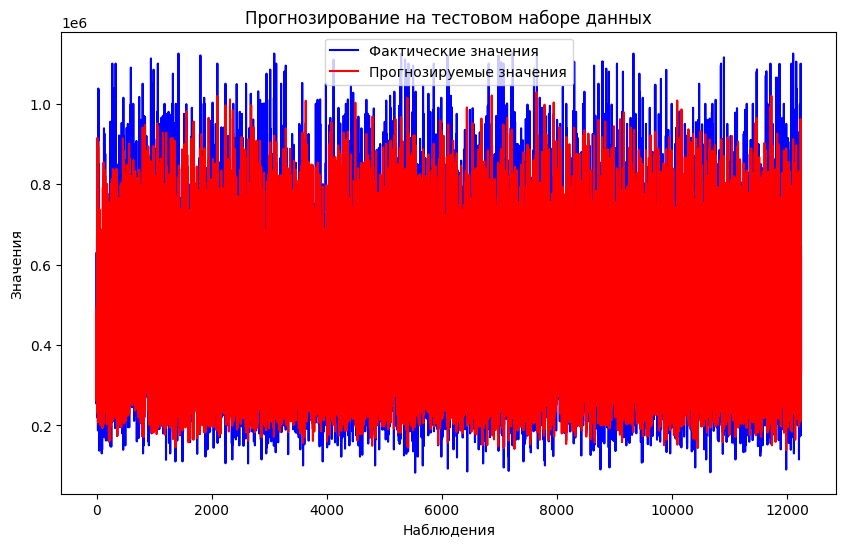

In [ ]:
import matplotlib.pyplot as plt

# Прогнозирование на тестовом наборе данных
predicted_values = gbr.predict(X_test)

# Построение графика с фактическими и прогнозируемыми значениями
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Фактические значения', color='blue')
plt.plot(predicted_values, label='Прогнозируемые значения', color='red')
plt.title('Прогнозирование на тестовом наборе данных')
plt.xlabel('Наблюдения')
plt.ylabel('Значения')
plt.legend()
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rand_regr = RandomForestRegressor(n_estimators=200,random_state=0)
rand_regr.fit(X_train, y_train)
predictions = rand_regr.predict(X_test)
randommse=mean_squared_error(y_test, predictions)
randomr=r2_score(y_test, predictions)

In [ ]:
predictions_train = rand_regr.predict(X_train)
mse_train = mean_squared_error(y_train, predictions_train)
r2_train = r2_score(y_train, predictions_train)
r2_train, mse_train

(0.9705657352462982, 1160455894.6500435)

In [ ]:
randomr, randommse


(0.7665553461549879, 32056235270.184525)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

params = {'n_estimators':200,
          'max_depth':6,
          'criterion':'squared_error',
          'learning_rate':0.03,
          'min_samples_leaf':16,
          'min_samples_split':16
          }
gbr = GradientBoostingRegressor(**params)

gbr.fit(X_train,y_train)
train_accuracy_score=gbr.score(X_train,y_train)
test_accuracy_score=gbr.score(X_test,y_test)
y_pred = gbr.predict(X_test)
print("train_accuracy_score: %.2f" % train_accuracy_score)
print("R^2: %.2f" % test_accuracy_score)

print("MSE: %.2f" % mean_squared_error(y_test,y_pred))

train_accuracy_score: 0.93
R^2: 0.78


ValueError: Found input variables with inconsistent numbers of samples: [6483, 15130]

In [ ]:

from sklearn.model_selection import cross_val_score, learning_curve, validation_curve
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
cv_scores = cross_val_score(gbr, X_train, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV R^2:", np.mean(cv_scores))

# Кривые обучения и валидации
train_sizes, train_scores, valid_scores = learning_curve(gbr, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)

Cross-Validation Scores: [0.79604346 0.79396663 0.80263466 0.82430109 0.79624967]
Mean CV R^2: 0.8026391004579875


In [ ]:
train_sizes, train_scores, valid_scores = learning_curve(rand_regr, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)

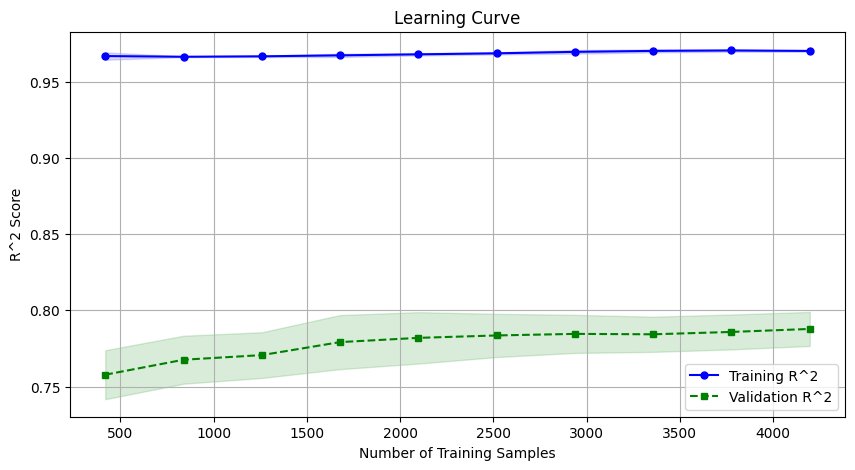

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training R^2')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, valid_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation R^2')
plt.fill_between(train_sizes, valid_mean + valid_std, valid_mean - valid_std, alpha=0.15, color='green')
plt.xlabel('Number of Training Samples')
plt.ylabel('R^2 Score')
plt.legend(loc='lower right')
plt.title('Learning Curve')
plt.grid()
plt.show()

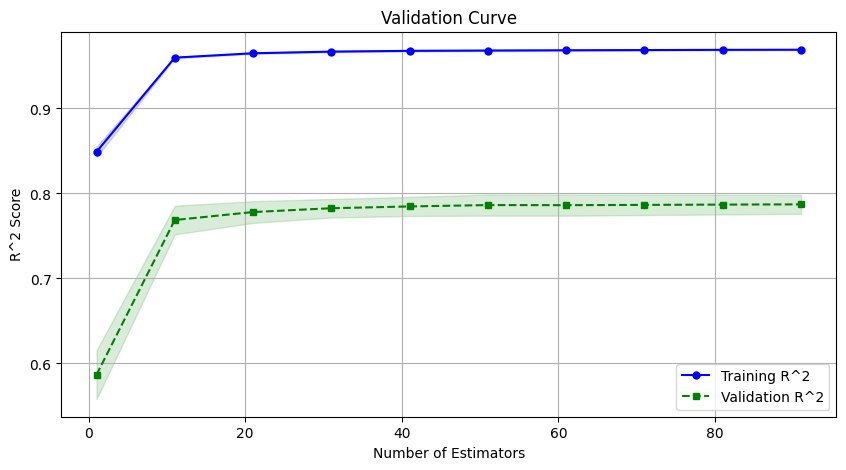

In [ ]:
param_range = np.arange(1, 100, 10)
train_scores, valid_scores = validation_curve(rand_regr, X_train, y_train, param_name='n_estimators', param_range=param_range, cv=5, scoring='r2')
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)

plt.figure(figsize=(10, 5))
plt.plot(param_range, train_mean, color='blue', marker='o', markersize=5, label='Training R^2')
plt.fill_between(param_range, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(param_range, valid_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation R^2')
plt.fill_between(param_range, valid_mean + valid_std, valid_mean - valid_std, alpha=0.15, color='green')
plt.xlabel('Number of Estimators')
plt.ylabel('R^2 Score')
plt.legend(loc='lower right')
plt.title('Validation Curve')
plt.grid()
plt.show()

In [ ]:
train_mean, train_std , valid_mean, valid_std

(array([0.85742561, 0.78572075, 0.80443541, 0.81551536, 0.8174611 ,
        0.83169507, 0.8324254 , 0.85109744, 0.85143388, 0.85162401]),
 array([0.00542324, 0.00335363, 0.01757891, 0.02151661, 0.01939484,
        0.0140317 , 0.0144472 , 0.00950479, 0.00834034, 0.00794248]),
 array([0.63446999, 0.66792319, 0.67142783, 0.68357674, 0.69538317,
        0.69466035, 0.69789926, 0.70809821, 0.70962522, 0.7081301 ]),
 array([0.03449066, 0.04876072, 0.05285249, 0.04557031, 0.03700072,
        0.02439037, 0.02171886, 0.02625292, 0.02809064, 0.02570623]))

In [ ]:
train_sizes, train_scores, valid_scores

(array([ 518, 1037, 1555, 2074, 2593, 3111, 3630, 4148, 4667, 5186]),
 array([[0.04467445, 0.04539273, 0.04418521, 0.04547439, 0.0444331 ],
        [0.37174974, 0.37936446, 0.36784678, 0.37701309, 0.37085317],
        [0.55610486, 0.56661371, 0.54998723, 0.56210624, 0.55560569],
        [0.66164107, 0.67419178, 0.65357717, 0.66754962, 0.66140156],
        [0.7245216 , 0.73662167, 0.71558554, 0.72885727, 0.72254991],
        [0.76366147, 0.77355552, 0.75264365, 0.76588095, 0.76087722],
        [0.78863485, 0.79609259, 0.77581717, 0.78887365, 0.78486038],
        [0.80483948, 0.81124167, 0.79169141, 0.80405334, 0.80139172],
        [0.81658453, 0.82149456, 0.80238157, 0.81453715, 0.81338259],
        [0.82696664, 0.82951149, 0.81030464, 0.82166824, 0.82199534]]),
 array([[0.03946226, 0.04181285, 0.03815345, 0.04688369, 0.04373354],
        [0.32354893, 0.35198704, 0.33851452, 0.38375314, 0.36623272],
        [0.47991633, 0.51642754, 0.51378863, 0.55640583, 0.5369191 ],
        [0.5721621

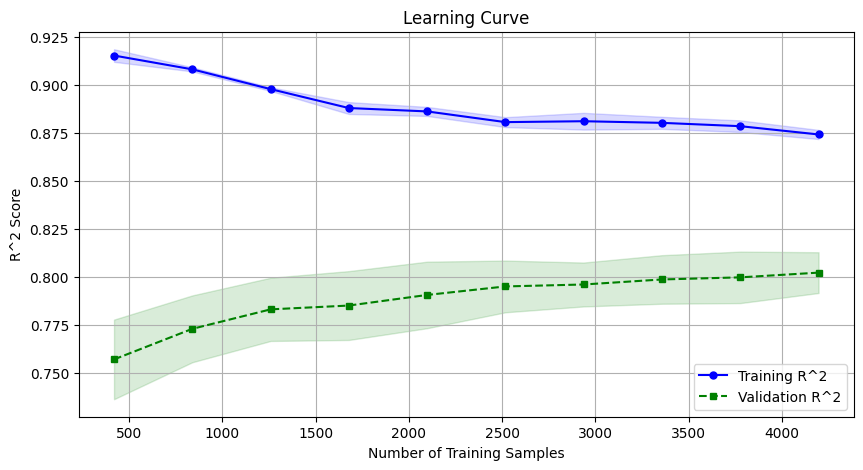

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training R^2')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, valid_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation R^2')
plt.fill_between(train_sizes, valid_mean + valid_std, valid_mean - valid_std, alpha=0.15, color='green')
plt.xlabel('Number of Training Samples')
plt.ylabel('R^2 Score')
plt.legend(loc='lower right')
plt.title('Learning Curve')
plt.grid()
plt.show()

In [ ]:
train_sizes, train_mean, train_std, valid_mean, valid_std

(array([ 419,  839, 1259, 1678, 2098, 2518, 2937, 3357, 3777, 4197]),
 array([0.05907242, 0.48816851, 0.72157647, 0.84853833, 0.91759831,
        0.95516343, 0.97559686, 0.98671173, 0.99275787, 0.99604689]),
 array([1.40760080e-06, 5.66215103e-06, 6.21319535e-06, 4.68508651e-06,
        3.13790674e-06, 2.23391292e-06, 1.75087713e-06, 1.50643314e-06,
        1.35906945e-06, 1.26312370e-06]),
 array([0.05419471, 0.48546669, 0.72009012, 0.84772029, 0.91714219,
        0.95491239, 0.97545736, 0.98663132, 0.99270986, 0.99601588]),
 array([7.05057687e-03, 3.77272842e-03, 2.03120659e-03, 1.08997424e-03,
        5.98551748e-04, 3.33403569e-04, 2.00342266e-04, 1.30677533e-04,
        9.09443332e-05, 6.76494453e-05]))

In [ ]:
train_sizes = np.linspace(.1, 1.0, 5)

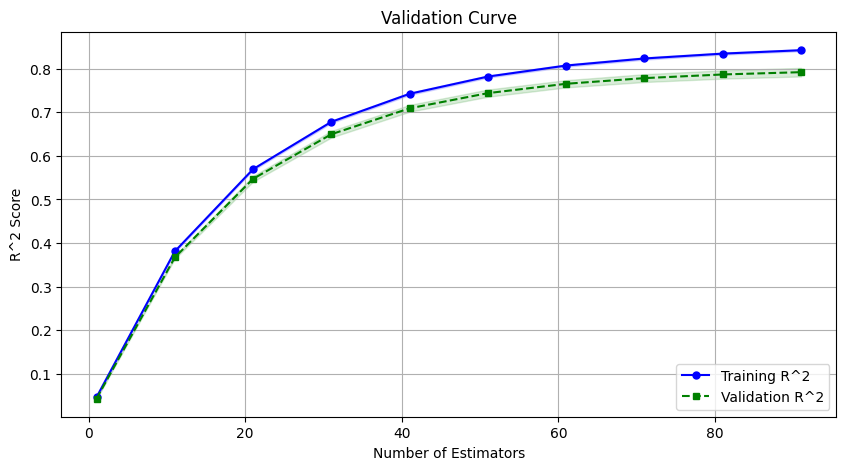

In [ ]:
# Регуляризация
param_range = np.arange(1, 100, 10)
train_scores, valid_scores = validation_curve(gbr, X_train, y_train, param_name='n_estimators', param_range=param_range, cv=5, scoring='r2')
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)

plt.figure(figsize=(10, 5))
plt.plot(param_range, train_mean, color='blue', marker='o', markersize=5, label='Training R^2')
plt.fill_between(param_range, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(param_range, valid_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation R^2')
plt.fill_between(param_range, valid_mean + valid_std, valid_mean - valid_std, alpha=0.15, color='green')
plt.xlabel('Number of Estimators')
plt.ylabel('R^2 Score')
plt.legend(loc='lower right')
plt.title('Validation Curve')
plt.grid()
plt.show()

In [ ]:
# Анализ ошибок
gbr.fit(X_train, y_train)
y_pred_train = gbr.predict(X_train)
y_pred_test = gbr.predict(X_test)
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
print("Train MSE:", train_mse)
print("Test MSE:", test_mse)

Train MSE: 261848.71829948176
Test MSE: 273824.66525356466


In [ ]:
from sklearn.model_selection import GridSearchCV, KFold

param_grid = {
    'n_estimators': [50, 100, 150],  # пример значений количества деревьев
}

# Инициализация объекта для кросс-валидации
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Поиск оптимальных параметров с помощью кросс-валидации
grid_search = GridSearchCV(gbr, param_grid, cv=cv, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)  # Предполагается, что у вас есть X_train и y_train


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=GradientBoostingRegressor(criterion='squared_error',
                                                 learning_rate=0.03,
                                                 max_depth=6,
                                                 min_samples_leaf=16,
                                                 min_samples_split=16,
                                                 n_estimators=200),
             param_grid={'n_estimators': [50, 100, 150]},
             scoring='neg_mean_squared_error')

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.feature_selection import SelectFromModel
import numpy as np

# Примеры методов для борьбы с переобучением

# 1. Кросс-валидация
def stratified_k_fold_cross_validation(X, y, model):
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(model, X, y, cv=skf)
    return scores.mean()

# 2. Регуляризация
def l1_feature_selection(X_train, y_train):
    lasso = LogisticRegression(penalty='l1', solver='liblinear')
    lasso.fit(X_train, y_train)
    sfm = SelectFromModel(lasso)
    sfm.fit(X_train, y_train)
    selected_features = sfm.transform(X_train)
    return selected_features

# 3. Отбор признаков
def feature_selection(X_train, y_train):
    # Пример отбора признаков с помощью модели случайного леса
    forest = RandomForestClassifier(n_estimators=100, random_state=42)
    forest.fit(X_train, y_train)
    sfm = SelectFromModel(forest, threshold=0.1)
    sfm.fit(X_train, y_train)
    selected_features = sfm.transform(X_train)
    return selected_features

# 4. Добавление данных
# Можно использовать методы для сбора дополнительных данных

# 5. Использование ансамблей моделей
def ensemble_models(X_train, y_train):
    # Пример использования градиентного бустинга
    gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
    gbc.fit(X_train, y_train)
    return gbc

# 1. Кросс-валидация
cv_score = stratified_k_fold_cross_validation(X_train, y_train, gbr)

# 2. Регуляризация (L1)
selected_features = l1_feature_selection(X_train, y_train)

# 3. Отбор признаков
selected_features = feature_selection(X_train, y_train)

# 5. Использование ансамблей моделей
gbc_model = ensemble_models(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

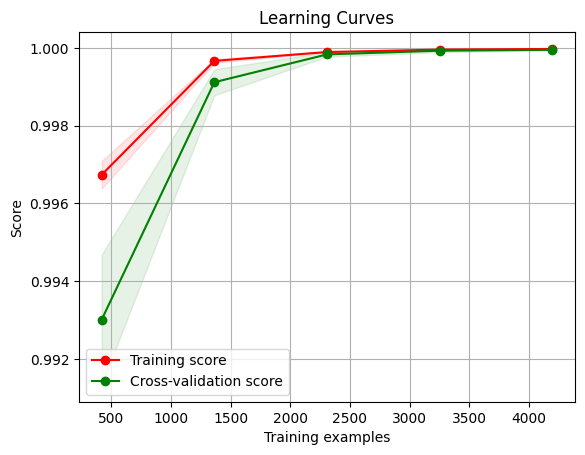

In [ ]:
from sklearn.model_selection import learning_curve
import numpy as np

# Your existing code here...

# 6. Plot learning curve using sklearn.model_selection.learning_curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.legend(loc="best")
    return plt

# Call the plot_learning_curve function with appropriate parameters
plot_learning_curve(gbr, "Learning Curves", X_train, y_train, cv=5)

In [ ]:
gbr.fit(X_train,y_train)
train_accuracy_score=gbr.score(X_train,y_train)
test_accuracy_score=gbr.score(X_test,y_test)
y_pred = gbr.predict(X_test)
print("train_accuracy_score: %.2f" % train_accuracy_score)
print("R^2: %.2f" % test_accuracy_score)
print("MSE: %.2f" % mean_squared_error(y_test,y_pred))

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
est=GradientBoostingRegressor(n_estimators=400, max_depth=5,min_samples_split=2,learning_rate=0.1).fit(X_train, y_train)
gradient=est.score(X_test,y_test)

pred = est.predict(X_test)

In [ ]:
models_cross = pd.DataFrame({
    'Model': ['Gradient Boosting','Random Forest'],
    'Score': [gradient,randomr]})

models_cross.sort_values(by='Score', ascending=False)

Model     Score
0  Gradient Boosting  0.784417
1      Random Forest  0.766555